# Employee Attrition Prediction Using Machine Learning

## Project Goal:
Predict employee attrition risk using structured HR data to support proactive workforce planning.

## Key Skills Demonstrated:
- Exploratory data analysis
- Feature engineering
- Model comparison
- Business insight generation

# Import Libraries

In [5193]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.impute import SimpleImputer  
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, roc_auc_score

from scipy.stats import chi2_contingency  # Chi-square test for categorical features
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Check multicollinearity
from sklearn.feature_selection import SelectKBest, f_classif  # Feature selection


from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting & hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Tree-based models
from sklearn.linear_model import LogisticRegression  # Baseline model
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from xgboost import XGBClassifier  # Extreme Gradient Boosting (Boosting model)
from catboost import CatBoostClassifier  # CatBoost (Handles categorical features well)
from lightgbm import LGBMClassifier  # LightGBM (Efficient boosting model)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix  # Performance metrics
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay  # Visualization for model performance

from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique (for imbalance)
from imblearn.under_sampling import RandomUnderSampler  # Undersampling
from imblearn.pipeline import Pipeline  # Pipelines with imbalanced data handling
from imblearn.over_sampling import ADASYN

import joblib  # Save trained models for later use


## Navigating Attrition

In today’s competitive labor market, retaining skilled employees is both a strategic priority and a financial imperative. High turnover not only disrupts team performance but also incurs significant costs related to recruitment, onboarding, and lost institutional knowledge. In this context, predictive modeling offers organizations the opportunity to shift from reactive to proactive workforce management. By identifying employees at risk of leaving, businesses can implement targeted interventions, such as tailored development plans, engagement initiatives, or workload adjustments, before attrition occurs. While the dataset used in this project is synthetic, the framework developed demonstrates how organizations can leverage machine learning to enhance HR decision-making, prioritize retention efforts, and manage talent pipelines more effectively.

# Employee Attrition Dataset Summary

Dataset source: https://www.kaggle.com/datasets/shree317/employees-attrition-and-leadership-impact-hr-data 

Ever wondered what REALLY drives employee turnover, performance, and retention? This power-packed dataset of 50,000 records uncovers the hidden patterns behind workforce dynamics, helping you decode the true story of hiring, leadership influence, and workplace engagement.

- Class Label: Attrition (Terminated = 1, Active = 0)
    - 1: Employee is no longer with the company
    - 0: Employee is still with the company


- EmployeeID - A unique identifier assigned to each employee.
- DateOfHire - Date of hire of the employee, DD/MM/YYYY
- DateOfBirth - Date of birth of the employee, DD/MM/YYYY
- Gender - Gender of the employee, Male, Female, Non-Binary
- Department - The department where the employee works (Sales, HR, IT, Marketing, Finance, Sales).
- JobTitle - Specific role or title of the employee (Manager, Team Lead, Analyst, Developer, Sales Rep).
- EmploymentStatus - On Leave, Active, Terminated 
- SupervisorID - Unique identifier for each supervisor
- SupervisorName - Name of employee supervisor
- SupervisorLevel - Level that the employee's supervisor is at
- ProjectsAssigned - Number of projects assigned to the employee (0-20)
- ProjectsCompleted - Number of projects complete by the employee (0-20)
- PerformanceRating - Rating of performance of employee, Score from 1 to 5
- Salary - Salary of the employee, Ranges between 30k and 120k 
- Bonus - Bonus assigned to employee, Ranges between 0.25 to 20k 
- YearsAtCompany - Number of years the employee has been at the company
- YearsInCurrentRole - Number of years the employee has been in their current role
- TrainingHours - Number of training hours of the employee
- OvertimeHours - Number of overtime hours of the employee
- Absences - Number of absences of the employee
- HireSource - Referral/Job Board/Walk-in/Recruiter 
- EmployeeEngagementScore - Self reported employee engagement score, Scale from 1 to 5
- TerminationDate - Date of termination of the employee, DD/MM/YYYY
- ReasonForLeaving - None/Layoff/Retirement/Resignation
- LastPromotionDate - Last data of promotion of the employee
- SeniorLeader - Senior leader of the employee
- TeamSize - Size of the team the employee is working with
- PromotionCount - Number of promotions the employee has obtained
- WorkFromHomeDays - Number of days the employee has worked from home
- PerformanceImprovementPlan - Plan to improve performance of the employee
- YearsSinceLastTraining - Number of years since employee has last has training
- JobSatisfactionScore - Self reported employee job satisfaction score, Between 1 and 5 
- RetentionRisk - How at risk the employee is for rentention, Low, Medium or High 
- DiversityCategory - Whether or not the employee falls under the diversity category, Diverse or Non-Diverse
- SkillsAssessmentScore - Skills assessment ascore of the employee, 50 to 100
- RecruitmentCost - Cost of recruitment of the employee
- TimeToFillPosition - Amount of time it took to fill the employee's position
- InternalPromotion - Whether or not the employee has had an internal promotion, Yes/No
- WorkHoursPerWeek - Number of hours per week the employee has worked 
- StressLevelScore - Stress level score, scale from 1 to 10


# 1. Import Data, check it over

In [5194]:

file_path = "hr analytics data - employees attrition and leadership impact.csv" 
df = pd.read_csv(file_path)

# Display basic info
print(df.info())  # Check data types and missing values
print(df.head())  # Show first 5 rows
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmployeeID                  50000 non-null  int64  
 1   DateOfHire                  50000 non-null  object 
 2   DateOfBirth                 50000 non-null  object 
 3   Gender                      50000 non-null  object 
 4   Department                  50000 non-null  object 
 5   JobTitle                    50000 non-null  object 
 6   EmploymentStatus            50000 non-null  object 
 7   SupervisorID                50000 non-null  int64  
 8   SupervisorName              50000 non-null  object 
 9   SupervisorLevel             50000 non-null  object 
 10  ProjectsAssigned            50000 non-null  int64  
 11  ProjectsCompleted           50000 non-null  int64  
 12  PerformanceRating           50000 non-null  int64  
 13  Salary                      500

# Preliminary Data Cleaning and Preprocessing

In [5195]:
#check for null values 
df.isnull().sum()

EmployeeID                        0
DateOfHire                        0
DateOfBirth                       0
Gender                            0
Department                        0
JobTitle                          0
EmploymentStatus                  0
SupervisorID                      0
SupervisorName                    0
SupervisorLevel                   0
ProjectsAssigned                  0
ProjectsCompleted                 0
PerformanceRating                 0
Salary                            0
Bonus                             0
YearsAtCompany                    0
YearsInCurrentRole                0
TrainingHours                     0
OvertimeHours                     0
Absences                          0
HireSource                        0
EmployeeEngagementScore           0
TerminationDate               33372
ReasonForLeaving              37635
LastPromotionDate             24927
SeniorLeader                      0
TeamSize                          0
PromotionCount              

Note: 
 - We want to keep the null values for the particular columns that have null values 
in this context because we use it to tell us whether or not someone is still employed or not.
For exmaple, TerminationDate null values means the employee is still employed, ReasonForLeaving
null values exist for employees that are still employed and LastPromotionDate refers to employees that
have gotten any promotion in the first place. 

- We are going to initially drop LastPromotionDate, then use TerminationDate for some hiring analysis, then drop it as well. 

- For ReasonForLeaving NaN values, we're going to replace the NaN values with a new category, "Still Employed" 

## Ridding ReasonForLeaving NaN values

In [5196]:
df['ReasonForLeaving'] = df['ReasonForLeaving'].fillna('Still Employed')

In [5197]:
#Drop irrelevant features 
df = df.drop(columns=['EmployeeID', 'SupervisorID', 'SupervisorName', 'SupervisorLevel', 
                      'SeniorLeader', 'PerformanceImprovementPlan', 'YearsSinceLastTraining', 
                      'RecruitmentCost','YearsSinceLastTraining',
                      'TimeToFillPosition', 'TrainingHours', 'LastPromotionDate', 
                      'InternalPromotion', 'HireSource'])

print(df.columns)

Index(['DateOfHire', 'DateOfBirth', 'Gender', 'Department', 'JobTitle',
       'EmploymentStatus', 'ProjectsAssigned', 'ProjectsCompleted',
       'PerformanceRating', 'Salary', 'Bonus', 'YearsAtCompany',
       'YearsInCurrentRole', 'OvertimeHours', 'Absences',
       'EmployeeEngagementScore', 'TerminationDate', 'ReasonForLeaving',
       'TeamSize', 'PromotionCount', 'WorkFromHomeDays',
       'JobSatisfactionScore', 'RetentionRisk', 'DiversityCategory',
       'SkillsAssessmentScore', 'WorkHoursPerWeek', 'StressLevelScore'],
      dtype='object')


In [5198]:
#check for null values 
df.isnull().sum()

DateOfHire                     0
DateOfBirth                    0
Gender                         0
Department                     0
JobTitle                       0
EmploymentStatus               0
ProjectsAssigned               0
ProjectsCompleted              0
PerformanceRating              0
Salary                         0
Bonus                          0
YearsAtCompany                 0
YearsInCurrentRole             0
OvertimeHours                  0
Absences                       0
EmployeeEngagementScore        0
TerminationDate            33372
ReasonForLeaving               0
TeamSize                       0
PromotionCount                 0
WorkFromHomeDays               0
JobSatisfactionScore           0
RetentionRisk                  0
DiversityCategory              0
SkillsAssessmentScore          0
WorkHoursPerWeek               0
StressLevelScore               0
dtype: int64

# Exploratory Analysis and Business Questions

### Obtain Target Variable

In [5199]:
# Convert EmploymentStatus column into "yes" = 1 or "no" = 0 Attrition column 
df['Attrition'] = df['EmploymentStatus'].apply(
    lambda x: 1 if x in ['Terminated', 'Retired'] else 0
)

In [5200]:
# Drop EmploymentStatus as a feature now 
df = df.drop(columns=['EmploymentStatus'])

In [5201]:
df['Attrition'].head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

### Exploring Categorical Variables 

In [5202]:
#Looking at basic descriptive statistics of categorical variables 
print(df.select_dtypes(include='object').describe())

        DateOfHire DateOfBirth Gender Department             JobTitle  \
count        50000       50000  50000      50000                50000   
unique        3653       16556      3          5                  639   
top     23-12-2024  26-11-1967   Male    Finance  Seismic interpreter   
freq            26          10  16792      10097                  104   

       TerminationDate ReasonForLeaving RetentionRisk DiversityCategory  
count            16628            50000         50000             50000  
unique            2983                4             3                 2  
top         26-01-2025   Still Employed        Medium       Non-Diverse  
freq                51            37635         16749             25084  


Notes: 
- There are only 3,653 unique hire dates. Were there mass hiring days? How many of those workers were part of a hiring bubble? Should I convert hire dates into hire weeks and do a time series analysis to see if there were mass hiring periods and of the employees hired over those mass hiring periods, how many of them have been retained? How many of them have been let go? Was the employer expecting those hires to be more of a temporary ordeal? 
- Check the variable balances of Gender 
- Check the variable balances of Department 
- Were there mass firing weeks? 
- Check the variable balances of RetentionRisk
- Check the proportions of Diverse/Non-Diverse

### Exploring Hiring Patterns

/var/folders/9s/n_b443gn67q4d4zmggsvrw340000gn/T/ipykernel_33563/1223437832.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateOfHire'] = pd.to_datetime(df['DateOfHire'], errors='coerce')


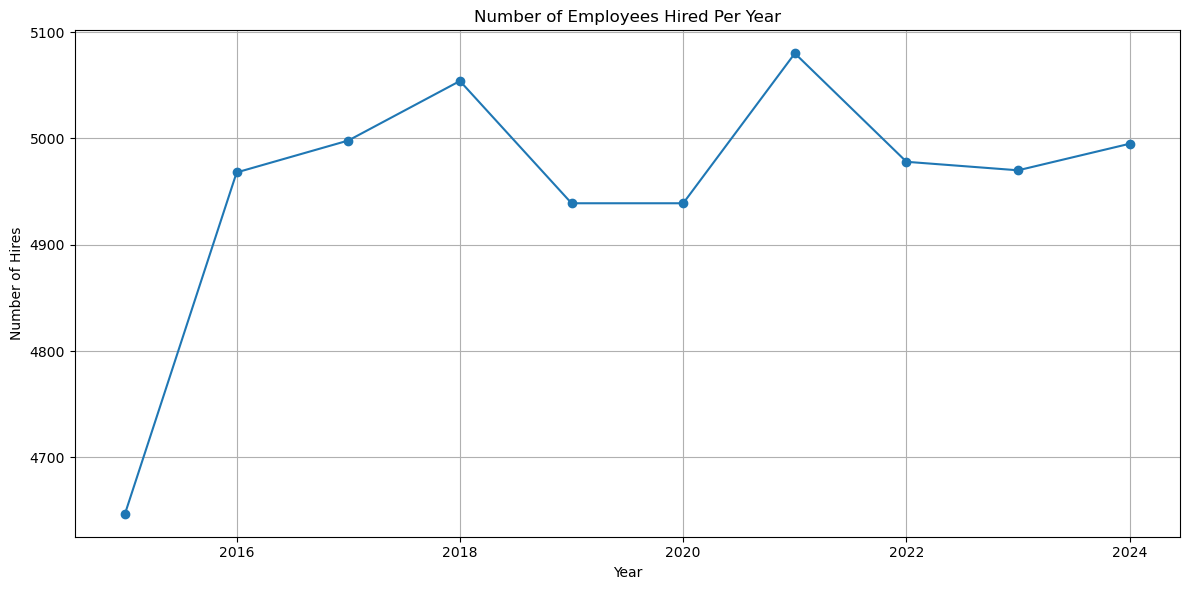

In [5203]:
df['DateOfHire'] = pd.to_datetime(df['DateOfHire'], errors='coerce')
# Group by year
df['HireYear'] = df['DateOfHire'].dt.year
hire_counts = df['HireYear'].value_counts().sort_index()

# Optionally drop the current (possibly partial) year
hire_counts = hire_counts[hire_counts.index < 2025]

# Plot
plt.figure(figsize=(12, 6))
hire_counts.plot(kind='line', marker='o')
plt.title('Number of Employees Hired Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights #1: 
- The number of hires hovers consistently around 4950-5080 
- This kind of precision is very rare in real data, which usually has economic or organizational flucuations 
- We should likely see a dip in hiring in 2020-2021 due to COVID, but that is absent in this dataset 

### Exploring Firing Patterns 

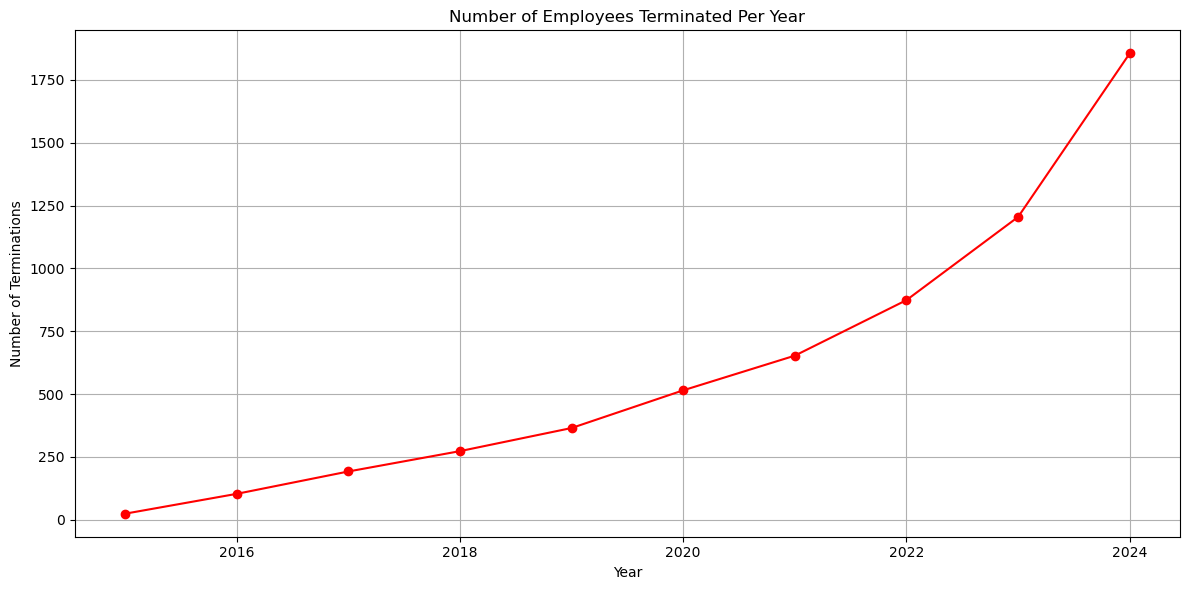

In [5204]:
df['TerminationDate'] = pd.to_datetime(df['TerminationDate'], errors='coerce')
df['TerminationYear'] = df['TerminationDate'].dt.year
termination_counts = df['TerminationYear'].value_counts().sort_index()

# Optionally drop the current (possibly partial) year
termination_counts = termination_counts[termination_counts.index < 2025]
plt.figure(figsize=(12, 6))
termination_counts.plot(kind='line', marker='o', color='red')
plt.title('Number of Employees Terminated Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Terminations')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights #1: 
- Unlike hiring, which stayed stable year-to-year, terminations increase sharply and steadily, especially from 2020 onward 
- The curve suggests an accelerating attrition trend, culminating in a major spike 

### Exploring Hiring Vs. Firing Patterns

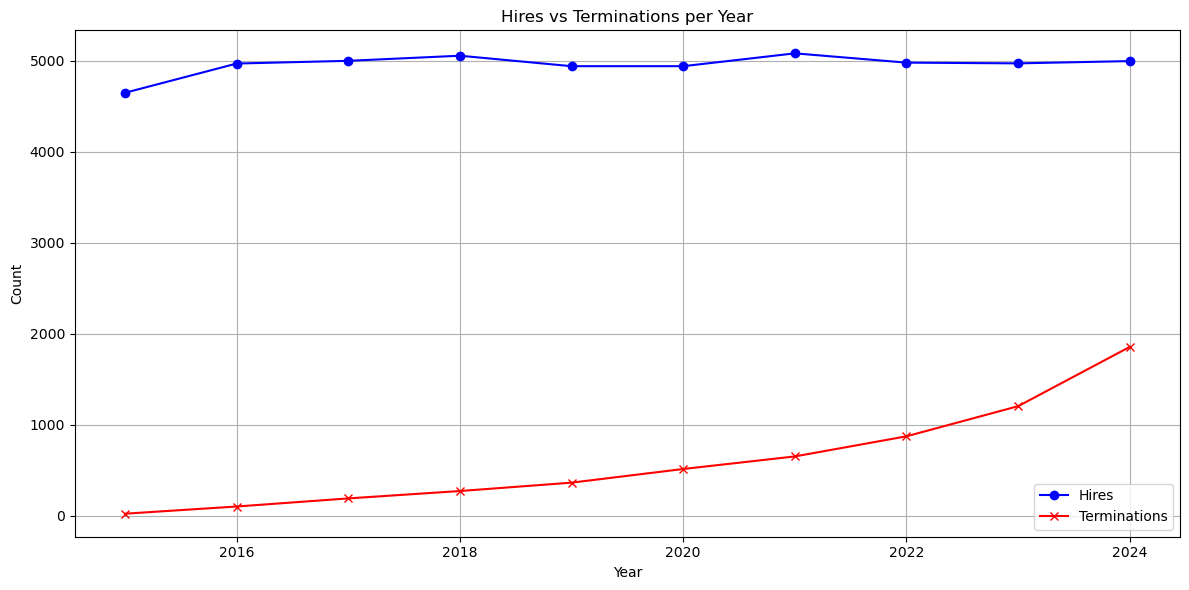

In [5205]:
plt.figure(figsize=(12, 6))
plt.plot(hire_counts, label='Hires', marker='o', color='blue')
plt.plot(termination_counts, label='Terminations', marker='x', color='red')
plt.title('Hires vs Terminations per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insights #1: 
- While hiring remained steady from 2015 to 2024, terminations increased sharply—suggesting rising attrition or workforce turnover. This may have been designed to reflect business challenges or train attrition prediction models. Real-world HR datasets would likely show more variation in both hiring and termination, but evidence points to this may being a synthetic dataset, which offers a clean baseline for testing data science workflows.

### Exploring Reasons for Leaving

In [5206]:
df['ReasonForLeaving'].value_counts()

ReasonForLeaving
Still Employed    37635
Layoff             4177
Retirement         4144
Resignation        4044
Name: count, dtype: int64

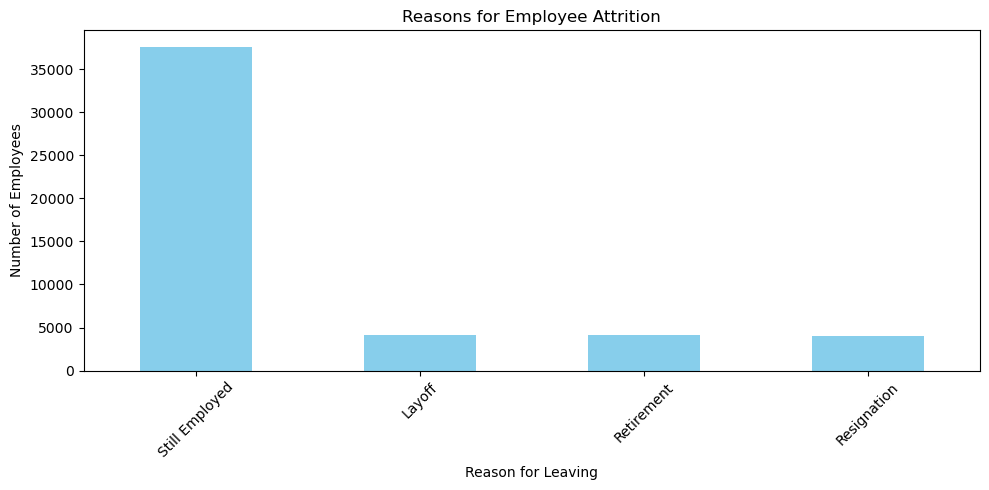

In [5207]:
import matplotlib.pyplot as plt

df['ReasonForLeaving'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Reasons for Employee Attrition')
plt.xlabel('Reason for Leaving')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights #1: 
- Over ~75% of the workforce is still employed, suggesting class imbalance we may have to deal with 
- Each type of attrition is roughly balanced, which is nice for modeling if we want to classify types of attrition

/var/folders/9s/n_b443gn67q4d4zmggsvrw340000gn/T/ipykernel_33563/1916743990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TY['ReasonForLeaving'] = df['ReasonForLeaving'].fillna('Still Employed')


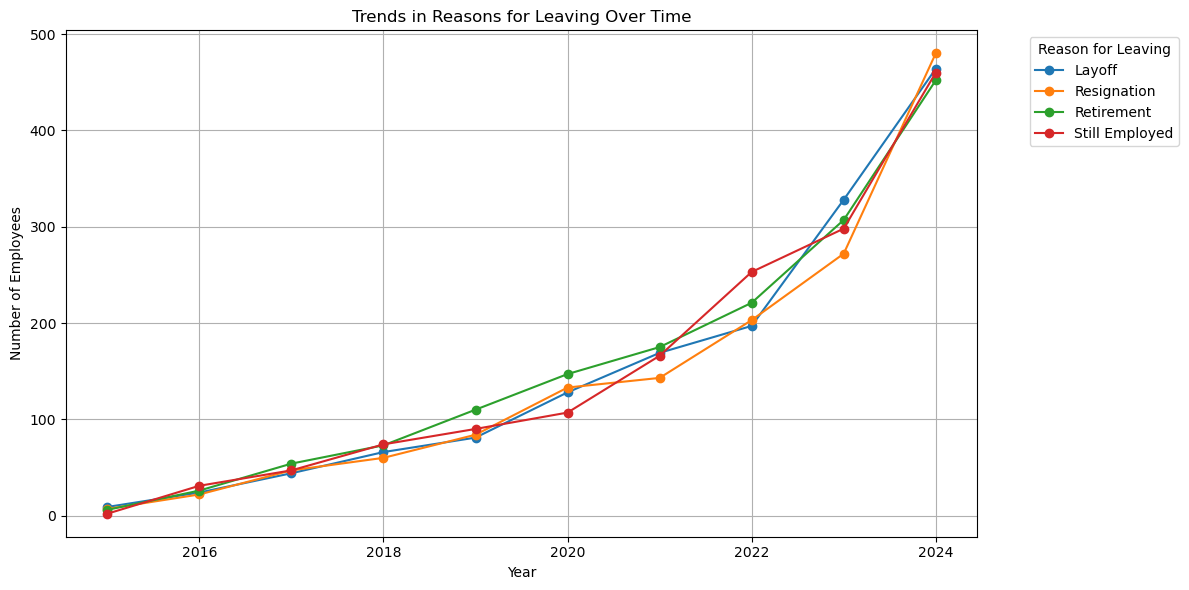

In [5208]:
#Making a new dataframe to hold TerminationYear and ReasonForLeaving
df['TerminationDate'] = pd.to_datetime(df['TerminationDate'], errors='coerce')
df['TerminationYear'] = df['TerminationDate'].dt.year
df_TY = df[df['TerminationYear'] < 2025]
df_TY['ReasonForLeaving'] = df['ReasonForLeaving'].fillna('Still Employed')
trend = df_TY.groupby(['TerminationYear', 'ReasonForLeaving']).size().unstack(fill_value=0)

trend.plot(figsize=(12, 6), marker='o')
plt.title('Trends in Reasons for Leaving Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.legend(title='Reason for Leaving', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights #1: 
- Layoffs, resignations and retirements all increased over time, possibly due to company growth or economic pressures 
- Resignation spikes shaprly in 2023-2024, which could indicate burnout, culture shift, or better external opportunities 
- Retirements rise steadily, which indicates the natural aging of the workforce or incentivized retirements

### Net Workforce Growth Per Year

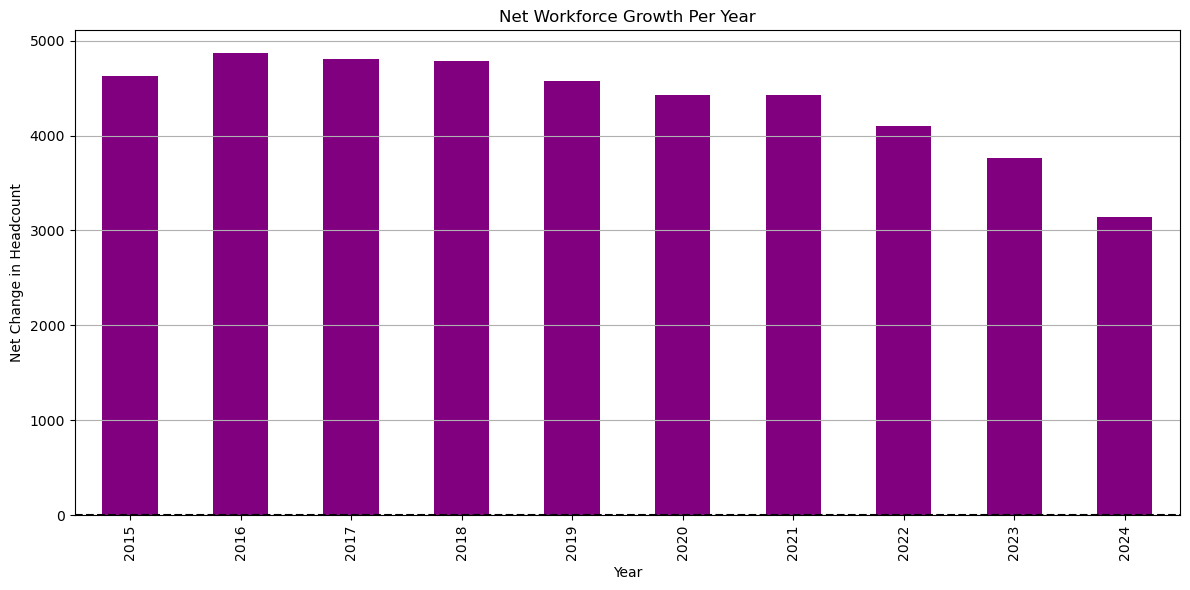

In [5209]:
# Reindex both to make sure all years are aligned
all_years = sorted(set(hire_counts.index).union(set(termination_counts.index)))
hire_counts = hire_counts.reindex(all_years, fill_value=0)
termination_counts = termination_counts.reindex(all_years, fill_value=0)

# Net growth = Hires - Terminations
net_growth = hire_counts - termination_counts

plt.figure(figsize=(12, 6))
net_growth.plot(kind='bar', color='purple')
plt.title('Net Workforce Growth Per Year')
plt.xlabel('Year')
plt.ylabel('Net Change in Headcount')
plt.axhline(0, color='black', linestyle='--')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Insights #1: 
- Although hiring volumes remained constant, increasing terminations began eroding workforce growth after 2018. This culminated in a substantial slowdown in net headcount growth by 2024, highlighting potential organizational or retention issues. If the trend continues, the company risks transitioning from expansion to contraction.

### Checking the proportions of categorical variables 

In [5210]:
df['Gender'].value_counts(normalize=True)

Gender
Male          0.33584
Non-Binary    0.33336
Female        0.33080
Name: proportion, dtype: float64

Insights: 
- Across all categories of Gender, the variable is balanced, which removes Gender as a source of bias in our model's learning process 
- The balancing of the Gender variable could pointing to a likely synthetic dataset 
- The dataset is relatively gender-balanced, with Non-Binary (33.8%), Male (33.6%), and Female (32.5%) representation. This reduces the risk of gender bias influencing model predictions.

In [5211]:
df['Department'].value_counts(normalize=True)

Department
Finance      0.20194
Marketing    0.19992
HR           0.19990
Sales        0.19960
IT           0.19864
Name: proportion, dtype: float64

Insights #1: 
- The variable Department has a very even spread, which is excellent for avoiding department-based class imbalance 
- The dataset maintains a fairly uniform distribution across departments, each contributing around 20% of the workforce. This allows for unbiased analysis of attrition by department.

In [5212]:
df['RetentionRisk'].value_counts(normalize=True)

RetentionRisk
Medium    0.33498
High      0.33358
Low       0.33144
Name: proportion, dtype: float64

Insights #2: 
- RetentionRisk is evenly distributed among High (33.6%), Medium (34.1%), and Low (32.3%) categories. This balance ensures the model can learn from each risk group without bias. Additional cross-tab analysis can help determine whether these labels correlate with actual attrition outcomes.

In [5213]:
df['DiversityCategory'].value_counts(normalize=True)

DiversityCategory
Non-Diverse    0.50168
Diverse        0.49832
Name: proportion, dtype: float64

Insights #3: 
- The dataset maintains near parity in diversity representation, with 50.4% of employees labeled as ‘Non-Diverse’ and 49.6% as ‘Diverse’. This balance enables robust analysis of diversity-related attrition trends and minimizes representation bias.

In [5214]:
df['Attrition'].value_counts(normalize=True)

Attrition
0    0.66744
1    0.33256
Name: proportion, dtype: float64

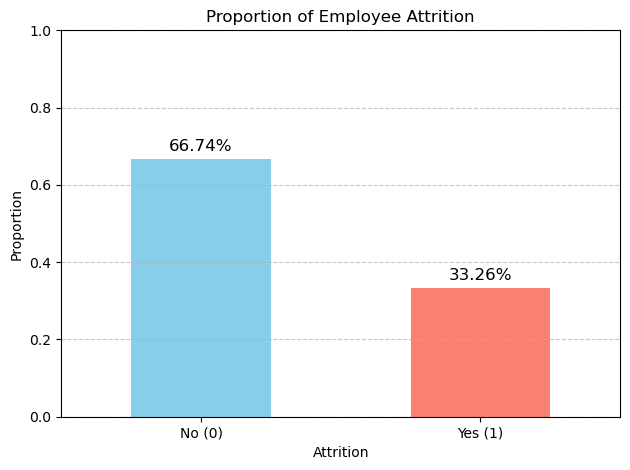

In [5269]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Attrition' is the target column
attrition_counts = df['Attrition'].value_counts(normalize=True)

# Plotting
attrition_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proportion of Employee Attrition')
plt.xlabel('Attrition')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with percentages
for i, value in enumerate(attrition_counts):
    plt.text(i, value + 0.02, f'{value:.2%}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Insights #1: 
- There is a 2:1 class imbalance, with ~1/3 of employees having left the company 
- This is not extreme, but still enough that a model might be biased toward predicting 0 (no attrition) unless handled properly.
- This makes our data a great candidate for SMOTE, threshold tuning and recall-optimized metrics (like F1-score, not just accuracy)
- The target variable Attrition is moderately imbalanced, with 66.7% of employees remaining and 33.3% having left. To account for this, SMOTE was applied to balance the training set, and threshold tuning was explored to improve recall and F1-score.

### Exploring Numerical Variables

In [5270]:
#Looking at basic descriptive statistics of numerical variables 
print(df.select_dtypes(include='number').describe())
numerical_features = df.select_dtypes(include='number')


       ProjectsAssigned  ProjectsCompleted  PerformanceRating         Salary  \
count      50000.000000       50000.000000       50000.000000   50000.000000   
mean          10.028620          10.012900           2.997480   75090.043952   
std            6.053701           6.042273           1.416825   25868.273525   
min            0.000000           0.000000           1.000000   30000.200000   
25%            5.000000           5.000000           2.000000   52884.180000   
50%           10.000000          10.000000           3.000000   75245.525000   
75%           15.000000          15.000000           4.000000   97426.855000   
max           20.000000          20.000000           5.000000  119994.800000   

              Bonus  YearsAtCompany  YearsInCurrentRole  OvertimeHours  \
count  50000.000000    50000.000000        50000.000000   50000.000000   
mean   10029.174125        5.002400            5.004720      25.026400   
std     5786.474683        3.173836            3.168807  

Notes: 
- ProjectsAssigned and ProjectsCompleted needs a more complete picture ie its descriptive statistics need to be 
put in context in order to make sense of them. For example, how many projects is too many projects? The workload
of a project may depend on a per Department basis. Another limitation of this dataset is not knowing the time span these projects were assigned, and therefore, we cannot pass judgement on workload. For example, 5 projects assigned to employee 1 in Department A may be considered a light workload whereas 5 projects assigned to employee 2 in Department B may be considered a heavy workload. 

- For the sake of the dataset and the information we are given, we will be assuming the number of projects assigned pertains to how many projects have been assigned during an employee's entire tenure at the company, so figures will have to be considered with this limitation in mind. 

- Regardless of context ProjectsAssigned and ProjectsCompleted, the averages of both (~10) are close to each other, which is a good sign of productivity 

- The average PerformanceRating of employees, ~3.00/5.00, suggests most employees are moderately rated. We may create categorical binning for PerformanceRating where 1-2=low, 3=med, 4-5=high. We'd like to investigate any relationship between these performance categories and Attrition. 

- Salary can be categorized into 3 categories based on Salary: low, med, high and further looked into for analysis

- Bonus ranges from $0.25 to ~$20k, with an average of ~$10k, suggesting that bonuses might be performance-based or linked to seniority.

- The average WorkHoursPerWeek is ~45, with an overtime averaging of ~25 hours/month --notable, but nothing extreme
- However, some employees work up to 60 hours/week and 50 overtime hours, which might indicate overwork in specific departments or roles.

- Avg: ~10 absences/year, which seems reasonable, but the max is 20 (almost 2/month). This could be normal or signal issues like burnout.

- On average, employees have received ~2.5 promotions, suggesting a fair level of upward mobility. It is assumed that the number of promotions are the timeline of YearsInCurrentRole

- Both Years at Company and Role hover around 5 years, indicating either lateral movement or consistent growth.

- Skills Assessment scores can be broken up into categories (A=80-90, B=60-70, C=50 and below), we can explore the relationship between SkillsAssessmentScores categories and the target variable, Attrition

- StressLevelScore can also be broken up into categories (or bins) where low=1-4, med=5-7 and high=8-10; we can explore the relationship between StressLevelScore and the target variable, Attrition 

- What is the average age of the terminated employee? What about the average age of the current employee? Create new columns that answer these questions and categorize these employees based on Age (young, prime, older)

Folowup:

- See if there's any proxy features (YearsAtCompany) that can help calculate the average number of projects that have been assigned (note: this rough estimate of projects assigned per year would assume the projects assigned are cumulative over time, but this may not reflect recent workload)

- PerformanceRating binning, low=1-2, med=3, high=4-5; then encode while retaining ranking; further analysis in correlation matrix

- Salary binning via even intervals; further analysis in correlation matrix

- Another limitation of this dataset is not having data of entire employee tenure. We only have data on employee tenure in a particular role and the number of internal promotions, so while we have insight into how many internal promotions have occurred, this still does not tell us anything about the overall tenure of the employee.

- Absences binning, via even intervals of 3; then encode while retaining ranking; further analysis between Department

- SkillsAssessmentScore binning, (A=80-90, B=60-70, C=50 and below), we can explore the relationship between SkillsAssessmentScores categories and the target variable, Attrition

- StressLevelScore binning, where low=1-4, med=5-7 and high=8-10; we can explore the relationship between StressLevelScore and the target variable, Attrition 

- Create Age feature. Find out the average age of the terminated employee and the active employee. From there, bin categories of Age into young, prime and older. 


# Feature Engineering

In [5271]:
#1. Creating a new Age feature
#convert date of birth to age: Using Age as a feature and making categories of ages, AgeGroup (young, middle aged, senior)
# Convert to datetime (make sure to set dayfirst=True if your dates are in DD/MM/YYYY format)
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], dayfirst=True)
df['TerminationDate'] = pd.to_datetime(df['TerminationDate'], dayfirst=True)
# Get today's date
today = pd.to_datetime("today")
# Calculate age
df['Age'] = df['DateOfBirth'].apply(lambda dob: 
    today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
)

#2. Making AgeGroup a column, binning young, prime and older professionals
bins = [17, 24, 54, float('inf')]
labels = ['YoungProfessionals', 'PrimeProfessionals', 'OlderProfessionals']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


#3. Making a new column for the ages of current employees (AgeCurrentEmployees)
df['AgeCurrentEmployees'] = df.apply(
    lambda row: today.year - row['DateOfBirth'].year 
                - ((today.month, today.day) < (row['DateOfBirth'].month, row['DateOfBirth'].day))
    if pd.isna(row['TerminationDate']) and pd.notnull(row['DateOfBirth']) else None,
    axis=1
)

#4. Finding AgeAtTermination
# Calculate age at termination
df['AgeAtTermination'] = df.apply(
    lambda row: row['TerminationDate'].year - row['DateOfBirth'].year 
                - ((row['TerminationDate'].month, row['TerminationDate'].day) < (row['DateOfBirth'].month, row['DateOfBirth'].day))
    if pd.notnull(row['TerminationDate']) and pd.notnull(row['DateOfBirth']) else None,
    axis=1
)


#6. Rough estimate of number of projects assigned per year since being at the company 
# Replace 0 with NaN to avoid inflating values, then fill NaNs with 0 later
df['ProjectsPerYear'] = df['ProjectsAssigned'] / df['YearsAtCompany'].replace(0, np.nan)


#7. PerformanceRating binning, low=1-2, med=3, high=4-5
# Define your bins and labels
bins = [0, 2, 3, 5]  # upper bound of each category (0 is a lower buffer)
labels = ['low', 'med', 'high']
# Create the new binned column
df['PerformanceBin'] = pd.cut(df['PerformanceRating'], bins=bins, labels=labels, right=True)

#8. Salary binning via even intervals
# Bin into 3 equal-width intervals
df['SalaryBin'] = pd.cut(df['Salary'], bins=3, labels=['low', 'med', 'high'])

#9. Absences binning, via even intervals of 3
# Bin Absences into 3 equal-width intervals
df['AbsenceBin'] = pd.cut(df['Absences'], bins=3, labels=['low', 'med', 'high'])


#10. StressLevelScore binning, where low=1-4, med=5-7 and high=8-10;
# Define the bin edges
bins = [0, 4, 7, 10]  # right edge is inclusive (e.g., 4 included in 'low', 7 in 'med')
# Define the labels
labels = ['low', 'med', 'high']
# Apply the binning
df['StressBin'] = pd.cut(df['StressLevelScore'], bins=bins, labels=labels, right=True)

#11. SkillsAssessmentScore binning
conditions = [
    (df['SkillsAssessmentScore'] >= 80.00) & (df['SkillsAssessmentScore'] <= 100.00),
    (df['SkillsAssessmentScore'] >= 60.00) & (df['SkillsAssessmentScore'] < 79.99),
    (df['SkillsAssessmentScore'] >= 50.00) & (df['SkillsAssessmentScore'] < 59.99),
    (df['SkillsAssessmentScore'] < 49.99)
]
grades = ['A', 'B', 'C', 'F']
df['SkillsGrade'] = np.select(conditions, grades, default='Other')

#12. Project Completion Rate 
df['ProjectCompletionRate'] = df['ProjectsCompleted'] / df['ProjectsAssigned'].replace(0, np.nan)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

KeyError: 'DateOfBirth'

In [5217]:
#Drop TerminationDate and TerminationYear from original dataframe, df, in order 
#to prevent data leakage 
#Can also drop DateOfHire, as it was used just for analysis purposes
df = df.drop(columns=['TerminationDate', 'TerminationYear', 'DateOfHire',
                      'DateOfBirth', 'JobTitle'])
df.columns

Index(['Gender', 'Department', 'ProjectsAssigned', 'ProjectsCompleted',
       'PerformanceRating', 'Salary', 'Bonus', 'YearsAtCompany',
       'YearsInCurrentRole', 'OvertimeHours', 'Absences',
       'EmployeeEngagementScore', 'ReasonForLeaving', 'TeamSize',
       'PromotionCount', 'WorkFromHomeDays', 'JobSatisfactionScore',
       'RetentionRisk', 'DiversityCategory', 'SkillsAssessmentScore',
       'WorkHoursPerWeek', 'StressLevelScore', 'Attrition', 'HireYear', 'Age',
       'AgeGroup', 'AgeCurrentEmployees', 'AgeAtTermination',
       'ProjectsPerYear', 'PerformanceBin', 'SalaryBin', 'AbsenceBin',
       'StressBin', 'SkillsGrade', 'ProjectCompletionRate'],
      dtype='object')

### Getting Categorical and Numerical Variables 

In [5218]:
numerical_features = df.select_dtypes(include='number')
categorical_features = df.select_dtypes(include=['object','category'])
categorical_features.columns

Index(['Gender', 'Department', 'ReasonForLeaving', 'RetentionRisk',
       'DiversityCategory', 'AgeGroup', 'PerformanceBin', 'SalaryBin',
       'AbsenceBin', 'StressBin', 'SkillsGrade'],
      dtype='object')

In [5219]:
df.columns
pd.set_option('display.max_columns', None)
df.head(5)

,Gender,Department,ProjectsAssigned,ProjectsCompleted,PerformanceRating,Salary,Bonus,YearsAtCompany,YearsInCurrentRole,OvertimeHours,Absences,EmployeeEngagementScore,ReasonForLeaving,TeamSize,PromotionCount,WorkFromHomeDays,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,WorkHoursPerWeek,StressLevelScore,Attrition,HireYear,Age,AgeGroup,AgeCurrentEmployees,AgeAtTermination,ProjectsPerYear,PerformanceBin,SalaryBin,AbsenceBin,StressBin,SkillsGrade,ProjectCompletionRate
0,Non-Binary,HR,16,5,3,93343.46,832.30,5,7,25,6,2.62,Still Employed,11,2,13,1.45,Low,Non-Diverse,50.26,50,6.63,0,2022,58,OlderProfessionals,58.0,NaN,3.200000,med,high,low,med,C,0.312500
1,Non-Binary,HR,16,17,4,73427.36,3257.50,5,3,39,7,2.26,Retirement,36,4,13,1.40,Medium,Diverse,97.90,50,5.68,1,2020,59,OlderProfessionals,NaN,55.0,3.200000,high,med,med,med,A,1.062500
2,Female,Marketing,9,4,5,61139.49,15121.63,7,6,49,12,4.50,Still Employed,42,1,18,4.46,Medium,Non-Diverse,78.61,55,8.51,0,2024,60,OlderProfessionals,60.0,NaN,1.285714,high,med,med,high,B,0.444444
3,Non-Binary,Marketing,14,11,4,35649.67,6889.36,2,2,24,19,4.03,Still Employed,44,4,15,1.09,Medium,Non-Diverse,95.29,56,3.34,0,2020,23,YoungProfessionals,23.0,NaN,7.000000,high,low,high,low,A,0.785714
4,Non-Binary,HR,4,4,3,57320.06,11421.73,10,7,45,12,4.43,Still Employed,25,5,2,3.21,High,Diverse,70.09,57,3.34,0,2023,31,PrimeProfessionals,31.0,NaN,0.400000,med,low,med,low,B,1.000000


# Continued EDA After Feature Engineering

In [5220]:
#Check out new basic descriptive statistics 
df.describe()

,ProjectsAssigned,ProjectsCompleted,PerformanceRating,Salary,Bonus,YearsAtCompany,YearsInCurrentRole,OvertimeHours,Absences,EmployeeEngagementScore,TeamSize,PromotionCount,WorkFromHomeDays,JobSatisfactionScore,SkillsAssessmentScore,WorkHoursPerWeek,StressLevelScore,Attrition,HireYear,Age,AgeCurrentEmployees,AgeAtTermination,ProjectsPerYear,ProjectCompletionRate
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43656.000000,6344.000000,45456.000000,47647.000000
mean,10.028620,10.012900,2.997480,75090.043952,10029.174125,5.002400,5.004720,25.026400,9.981540,3.004471,27.420280,2.496860,10.002640,2.991840,74.966885,44.987400,5.511490,0.332560,2019.578760,41.653380,41.666552,38.810057,2.945550,1.789312
std,6.053701,6.042273,1.416825,25868.273525,5786.474683,3.173836,3.168807,14.732723,6.059394,1.153266,13.324633,1.711645,6.047919,1.154465,14.420894,8.947637,2.602615,0.471135,2.889215,13.853819,13.844212,14.148311,3.562240,2.742398
min,0.000000,0.000000,1.000000,30000.200000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,50.000000,30.000000,1.000000,0.000000,2015.000000,18.000000,18.000000,9.000000,0.000000,0.000000
25%,5.000000,5.000000,2.000000,52884.180000,5034.715000,2.000000,2.000000,12.000000,5.000000,2.000000,16.000000,1.000000,5.000000,1.990000,62.540000,37.000000,3.250000,0.000000,2017.000000,30.000000,30.000000,27.000000,0.875000,0.454545
50%,10.000000,10.000000,3.000000,75245.525000,10027.525000,5.000000,5.000000,25.000000,10.000000,3.000000,27.000000,2.000000,10.000000,2.980000,74.950000,45.000000,5.530000,0.000000,2020.000000,42.000000,42.000000,39.000000,1.833333,1.000000
75%,15.000000,15.000000,4.000000,97426.855000,15036.405000,8.000000,8.000000,38.000000,15.000000,4.000000,39.000000,4.000000,15.000000,4.000000,87.430000,53.000000,7.760000,1.000000,2022.000000,54.000000,54.000000,51.000000,3.333333,1.818182
max,20.000000,20.000000,5.000000,119994.800000,19999.910000,10.000000,10.000000,50.000000,20.000000,5.000000,50.000000,5.000000,20.000000,5.000000,100.000000,60.000000,10.000000,1.000000,2025.000000,66.000000,66.000000,66.000000,20.000000,20.000000


Insights #1: 
- AgeCurrentEmployees avg is ~42 years with 75th percentile = 54. Workforce skews mature, which may impact attrition or succession planning
- AgeAtTermination avg is ~39 which may indicate that younger employees may be leaving more often --likely early-career churn 

### Salary Distribution

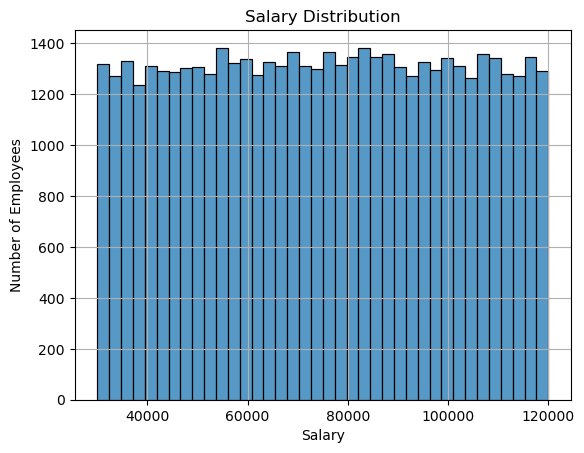

In [5221]:
#Looking at distribution of Salary feature 
sns.histplot(data=df, x='Salary')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

Insights #1: 
- Because this distribution is evenly distributed, it is likely synthetic or masked Salary data. Therefore, it does not reflect real-world salary distributions. Let's confirm our suspiscion by plotting all numerical variables and seeing if there is the continued pattern of even distributions. 

### Salary vs. YearsAtCompany

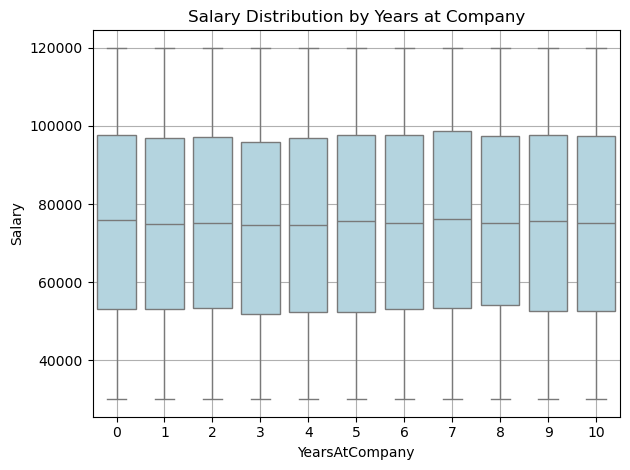

In [5222]:
sns.boxplot(data=df, x='YearsAtCompany', y='Salary', color='lightblue')
plt.title('Salary Distribution by Years at Company')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights #1: 
- There is no upward salary trend over time (which could be a potential issue for retention)
- Salary shows no meaningful correlation with years at company, indicating that the dataset may lack realistic compensation dynamics. This weakens its ability to capture tenure-driven attrition risk or reward-based retention patterns.

### Bonus Distribution

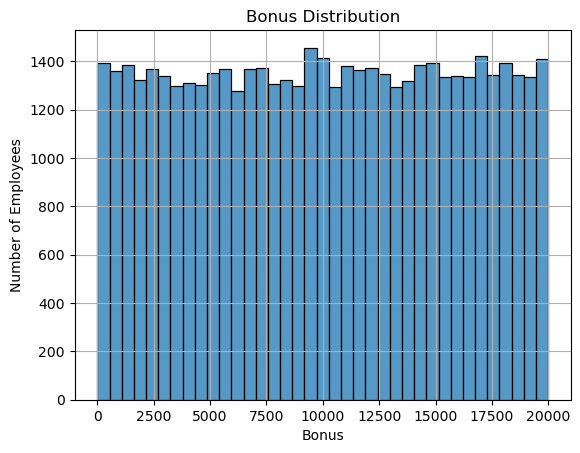

In [5223]:
sns.histplot(data=df, x='Bonus')
plt.title('Bonus Distribution')
plt.xlabel('Bonus')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

Insights #1: 
- Bonus amounts are uniformly distributed across the entire range of $0–$20,000. This suggests the data is synthetic and lacks realistic compensation dynamics that would exist in real-world organizational data.

### Bonus vs. YearsInCurrentRole

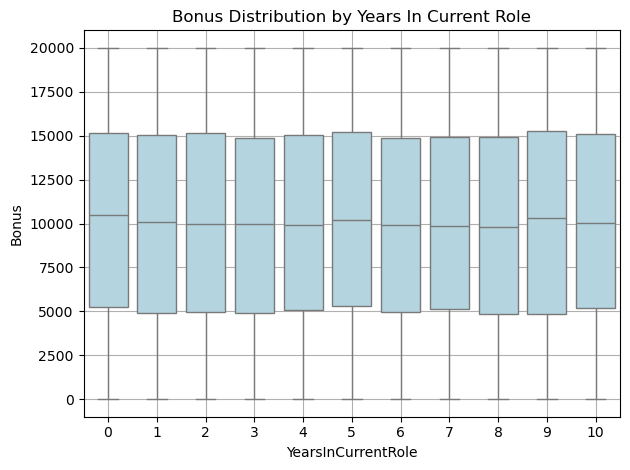

In [5224]:
sns.boxplot(data=df, x='YearsInCurrentRole', y='Bonus', color='lightblue')
plt.title('Bonus Distribution by Years In Current Role')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights #1: 
- Bonus amounts appear uniformly distributed and show no meaningful change with years in current role. This suggests a lack of real-world bonus progression logic, reinforcing the synthetic nature of the dataset.

In [5225]:
df[['Bonus', 'PerformanceRating']].corr()

,Bonus,PerformanceRating
Bonus,1.000000,-0.000725
PerformanceRating,-0.000725,1.000000


Insights #2: 
- Bonuses were generated completely independently of performance, making this feature potentially non-informative for predictive modeling. 

In [5226]:
df[['OvertimeHours', 'Absences']].corr()

,OvertimeHours,Absences
OvertimeHours,1.000000,-0.000608
Absences,-0.000608,1.000000


Insights #3: 
- Despite intuitive expectations, there is virtually no correlation between overtime hours and absences (r = –0.0006). This suggests the features were independently generated and do not reflect real-world behavioral patterns.

In [5227]:
df[['OvertimeHours', 'Age']].corr()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,OvertimeHours,Age
OvertimeHours,1.000000,-0.004324
Age,-0.004324,1.000000


Insights #4: 
- Key behavioral and demographic features — such as age and overtime hours — show virtually no relationship (r = –0.0043). This further indicates that the dataset lacks real-world interaction patterns between variables.

In [5228]:
df[['ProjectsPerYear', 'Attrition']].corr()

,ProjectsPerYear,Attrition
ProjectsPerYear,1.000000,0.007572
Attrition,0.007572,1.000000


Insights #5: 
- Workload-related variables such as ProjectsPerYear have no measurable relationship with attrition (r = 0.0076), reinforcing that the dataset lacks realistic causal or behavioral structures.

In [5229]:
df[['ProjectCompletionRate', 'Attrition']].corr()

,ProjectCompletionRate,Attrition
ProjectCompletionRate,1.000000,-0.000286
Attrition,-0.000286,1.000000


Insights #6: 
- Key performance-related features such as ProjectCompletionRate show no statistical relationship to attrition (r = –0.0003), suggesting a lack of behavioral linkage in the data generation process.

In [5230]:
# Get top correlations with Attrition
corr = numerical_features.corr()['Attrition'].drop('Attrition')
corr_abs = corr.abs().sort_values(ascending=False)
print(corr.loc[corr_abs.index[:10]])

EmployeeEngagementScore   -0.008311
ProjectsPerYear            0.007572
StressLevelScore           0.004966
ProjectsAssigned           0.004657
OvertimeHours             -0.003783
HireYear                  -0.003212
Salary                    -0.003102
JobSatisfactionScore       0.003046
PerformanceRating          0.002903
PromotionCount            -0.002500
Name: Attrition, dtype: float64


Insights #7: 
- None of the core behavioral, performance, or compensation features show meaningful correlation with attrition. This confirms that the dataset is synthetic and lacks realistic relationships between predictors and the target variable. As a result, model performance is likely to remain low regardless of algorithm or tuning strategy.

In [5231]:
df[['Age', 'Attrition']].corr()

,Age,Attrition
Age,1.000000,0.000014
Attrition,0.000014,1.000000


Insights #8: 
- Age is a well-documented predictor of employee attrition in real-world HR datasets. However, in this dataset, age exhibits virtually no correlation with attrition (r = 0.00003), suggesting a lack of realistic demographic patterns. This further supports the notion that the dataset is synthetic and lacks predictive structure.

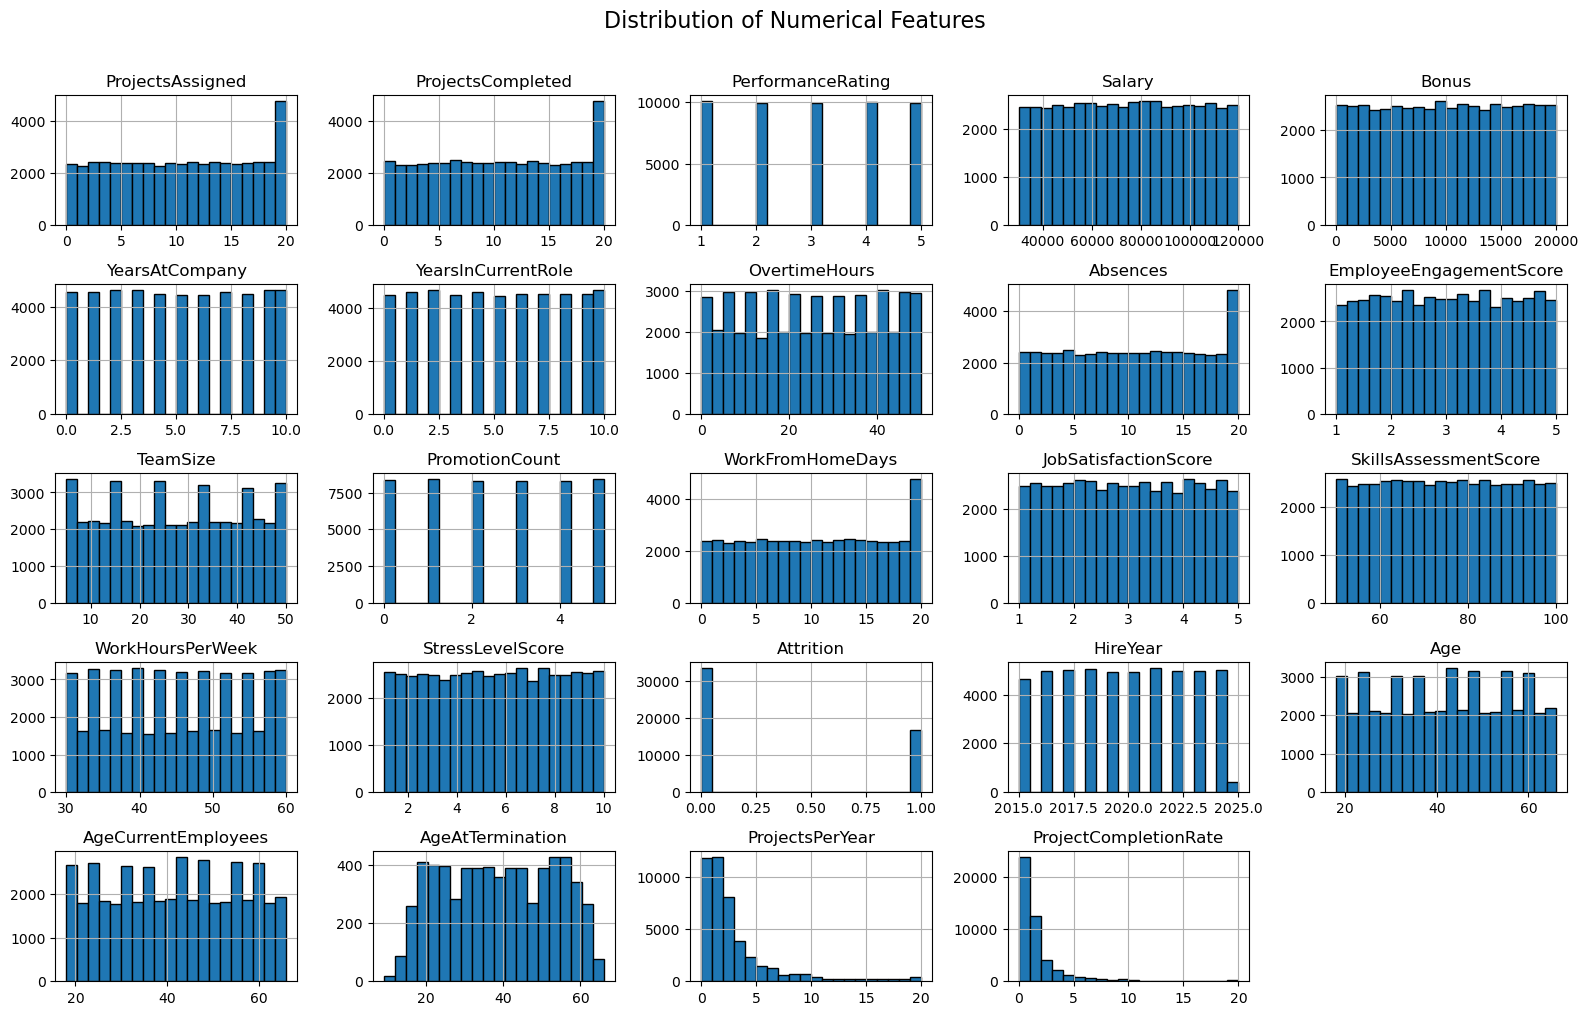

In [5232]:
# Set the figure size and layout
numerical_features.hist(bins=20, figsize=(16, 12), layout=(6, 5), edgecolor='black')

plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the title
plt.show()

Insights #1: 
- The distribution of numerical features reveals that many variables were synthetically generated with uniform or arbitrary patterns. For example, Bonus, Salary, and PerformanceRating exhibit flat or even spacing across their ranges. This lack of natural variation, combined with the absence of correlation between key behavioral indicators and attrition, suggests that the dataset does not capture realistic employee dynamics. As a result, predictive modeling is inherently limited.

# Encoding Variables

In [5233]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(categorical_columns)
print(numerical_columns)

['Gender', 'Department', 'ReasonForLeaving', 'RetentionRisk', 'DiversityCategory', 'AgeGroup', 'PerformanceBin', 'SalaryBin', 'AbsenceBin', 'StressBin', 'SkillsGrade']
['ProjectsAssigned', 'ProjectsCompleted', 'PerformanceRating', 'Salary', 'Bonus', 'YearsAtCompany', 'YearsInCurrentRole', 'OvertimeHours', 'Absences', 'EmployeeEngagementScore', 'TeamSize', 'PromotionCount', 'WorkFromHomeDays', 'JobSatisfactionScore', 'SkillsAssessmentScore', 'WorkHoursPerWeek', 'StressLevelScore', 'Attrition', 'Age', 'AgeCurrentEmployees', 'AgeAtTermination', 'ProjectsPerYear', 'ProjectCompletionRate']


### Dropping Data Leakage 

In [5234]:
 # Delete data leakage features (delete features where they exist only after the employee leaves)
df = df.drop(columns=['ReasonForLeaving', 'AgeAtTermination',
                  'AgeCurrentEmployees'])
df.columns

Index(['Gender', 'Department', 'ProjectsAssigned', 'ProjectsCompleted',
       'PerformanceRating', 'Salary', 'Bonus', 'YearsAtCompany',
       'YearsInCurrentRole', 'OvertimeHours', 'Absences',
       'EmployeeEngagementScore', 'TeamSize', 'PromotionCount',
       'WorkFromHomeDays', 'JobSatisfactionScore', 'RetentionRisk',
       'DiversityCategory', 'SkillsAssessmentScore', 'WorkHoursPerWeek',
       'StressLevelScore', 'Attrition', 'HireYear', 'Age', 'AgeGroup',
       'ProjectsPerYear', 'PerformanceBin', 'SalaryBin', 'AbsenceBin',
       'StressBin', 'SkillsGrade', 'ProjectCompletionRate'],
      dtype='object')

In [5235]:
#Encoding categorical variables 

#Encoding for non-ranking categorical features:

# One-hot encode nominal features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Department', 'DiversityCategory'], drop_first=True)

#Encoding for ordinal categorical features:

#ordinal encode AgeGroup or RetentionRisk if applicable
df_encoded['AgeGroupEncoded'] = df['AgeGroup'].map({'YoungProfessionals': 1, 'PrimeProfessionals': 2, 'OlderProfessionals': 3})

#Encoding for PerformanceBin 
# Define the order explicitly
performance_order = {'low': 0, 'med': 1, 'high': 2}
# Map the string bins to numbers
df_encoded['PerformanceBinEncoded'] = df['PerformanceBin'].map(performance_order)

#Encoding for SalaryBin 
salary_order = {'low': 0, 'med': 1, 'high': 2}
df_encoded['SalaryBinEncoded'] = df['SalaryBin'].map(salary_order)

#Encoding for AbsenceBin 
absence_order = {'low': 0, 'med': 1, 'high': 2}
df_encoded['AbsenceBinEncoded'] = df['AbsenceBin'].map(absence_order)

#Encoding for StressBin 
stress_order = {'low': 0, 'med': 1, 'high': 2}
df_encoded['StressBinEncoded'] = df['StressBin'].map(stress_order)

#Encoding for SkillsGrade 
grade_order = {'F': 0, 'C': 1, 'B': 2, 'A': 3}
df_encoded['SkillsGradeEncoded'] = df['SkillsGrade'].map(grade_order)

#Encoding for RetentionRisk
# Define the order
risk_order = {'Low': 0, 'Medium': 1, 'High': 2}
# Map it
df_encoded['RetentionRiskEncoded'] = df['RetentionRisk'].map(risk_order)


print(df_encoded.columns)
#Convert to numerica-only Dataframe 
numerical_df = df_encoded.select_dtypes(include=['number', 'bool', 'category'])

#df_encoded.info()

#Clean up dataframe
df_encoded = df_encoded.drop(columns=[
    'AgeGroup', 'PerformanceBin', 'SalaryBin', 'AbsenceBin', 
    'StressBin', 'SkillsGrade', 'RetentionRisk'
])

#Convert to numerica-only Dataframe 
numerical_df = df_encoded.select_dtypes(include=['number', 'bool', 'category'])

#Dropping highly correlated variables 
numerical_df = numerical_df.drop(columns=['ProjectsAssigned'])

#The following features have both continuous and binned versions: 

#Continuous versions:
#PerformanceRating, Salary, Absences, SkillsAssessmentScore, StressLevelScore, Age
#Binned versions: 
# PerformanceBinEncoded, SalaryBinEncoded, AbsenceBinEncoded, StressBinEncoded, SkillsGradeEncoded, AgeGroupEncoded

                                          
#Test version #1 (continuous version)
df_continuous = numerical_df.drop(columns=['PerformanceBinEncoded', 'SalaryBinEncoded', 
                                          'AbsenceBinEncoded', 'StressBinEncoded',
                                          'SkillsGradeEncoded', 'AgeGroupEncoded'])

# #Test version #2 (binned version)
df_binned = numerical_df.drop(columns=['PerformanceRating', 'Salary', 
                                          'Absences', 'SkillsAssessmentScore',
                                          'StressLevelScore', 'Age'])
print(numerical_df.columns)



Index(['ProjectsAssigned', 'ProjectsCompleted', 'PerformanceRating', 'Salary',
       'Bonus', 'YearsAtCompany', 'YearsInCurrentRole', 'OvertimeHours',
       'Absences', 'EmployeeEngagementScore', 'TeamSize', 'PromotionCount',
       'WorkFromHomeDays', 'JobSatisfactionScore', 'RetentionRisk',
       'SkillsAssessmentScore', 'WorkHoursPerWeek', 'StressLevelScore',
       'Attrition', 'HireYear', 'Age', 'AgeGroup', 'ProjectsPerYear',
       'PerformanceBin', 'SalaryBin', 'AbsenceBin', 'StressBin', 'SkillsGrade',
       'ProjectCompletionRate', 'Gender_Male', 'Gender_Non-Binary',
       'Department_HR', 'Department_IT', 'Department_Marketing',
       'Department_Sales', 'DiversityCategory_Non-Diverse', 'AgeGroupEncoded',
       'PerformanceBinEncoded', 'SalaryBinEncoded', 'AbsenceBinEncoded',
       'StressBinEncoded', 'SkillsGradeEncoded', 'RetentionRiskEncoded'],
      dtype='object')
Index(['ProjectsCompleted', 'PerformanceRating', 'Salary', 'Bonus',
       'YearsAtCompany', 'YearsIn

# Generating Heatmap To Check Correlations

## Continuous Feature Version

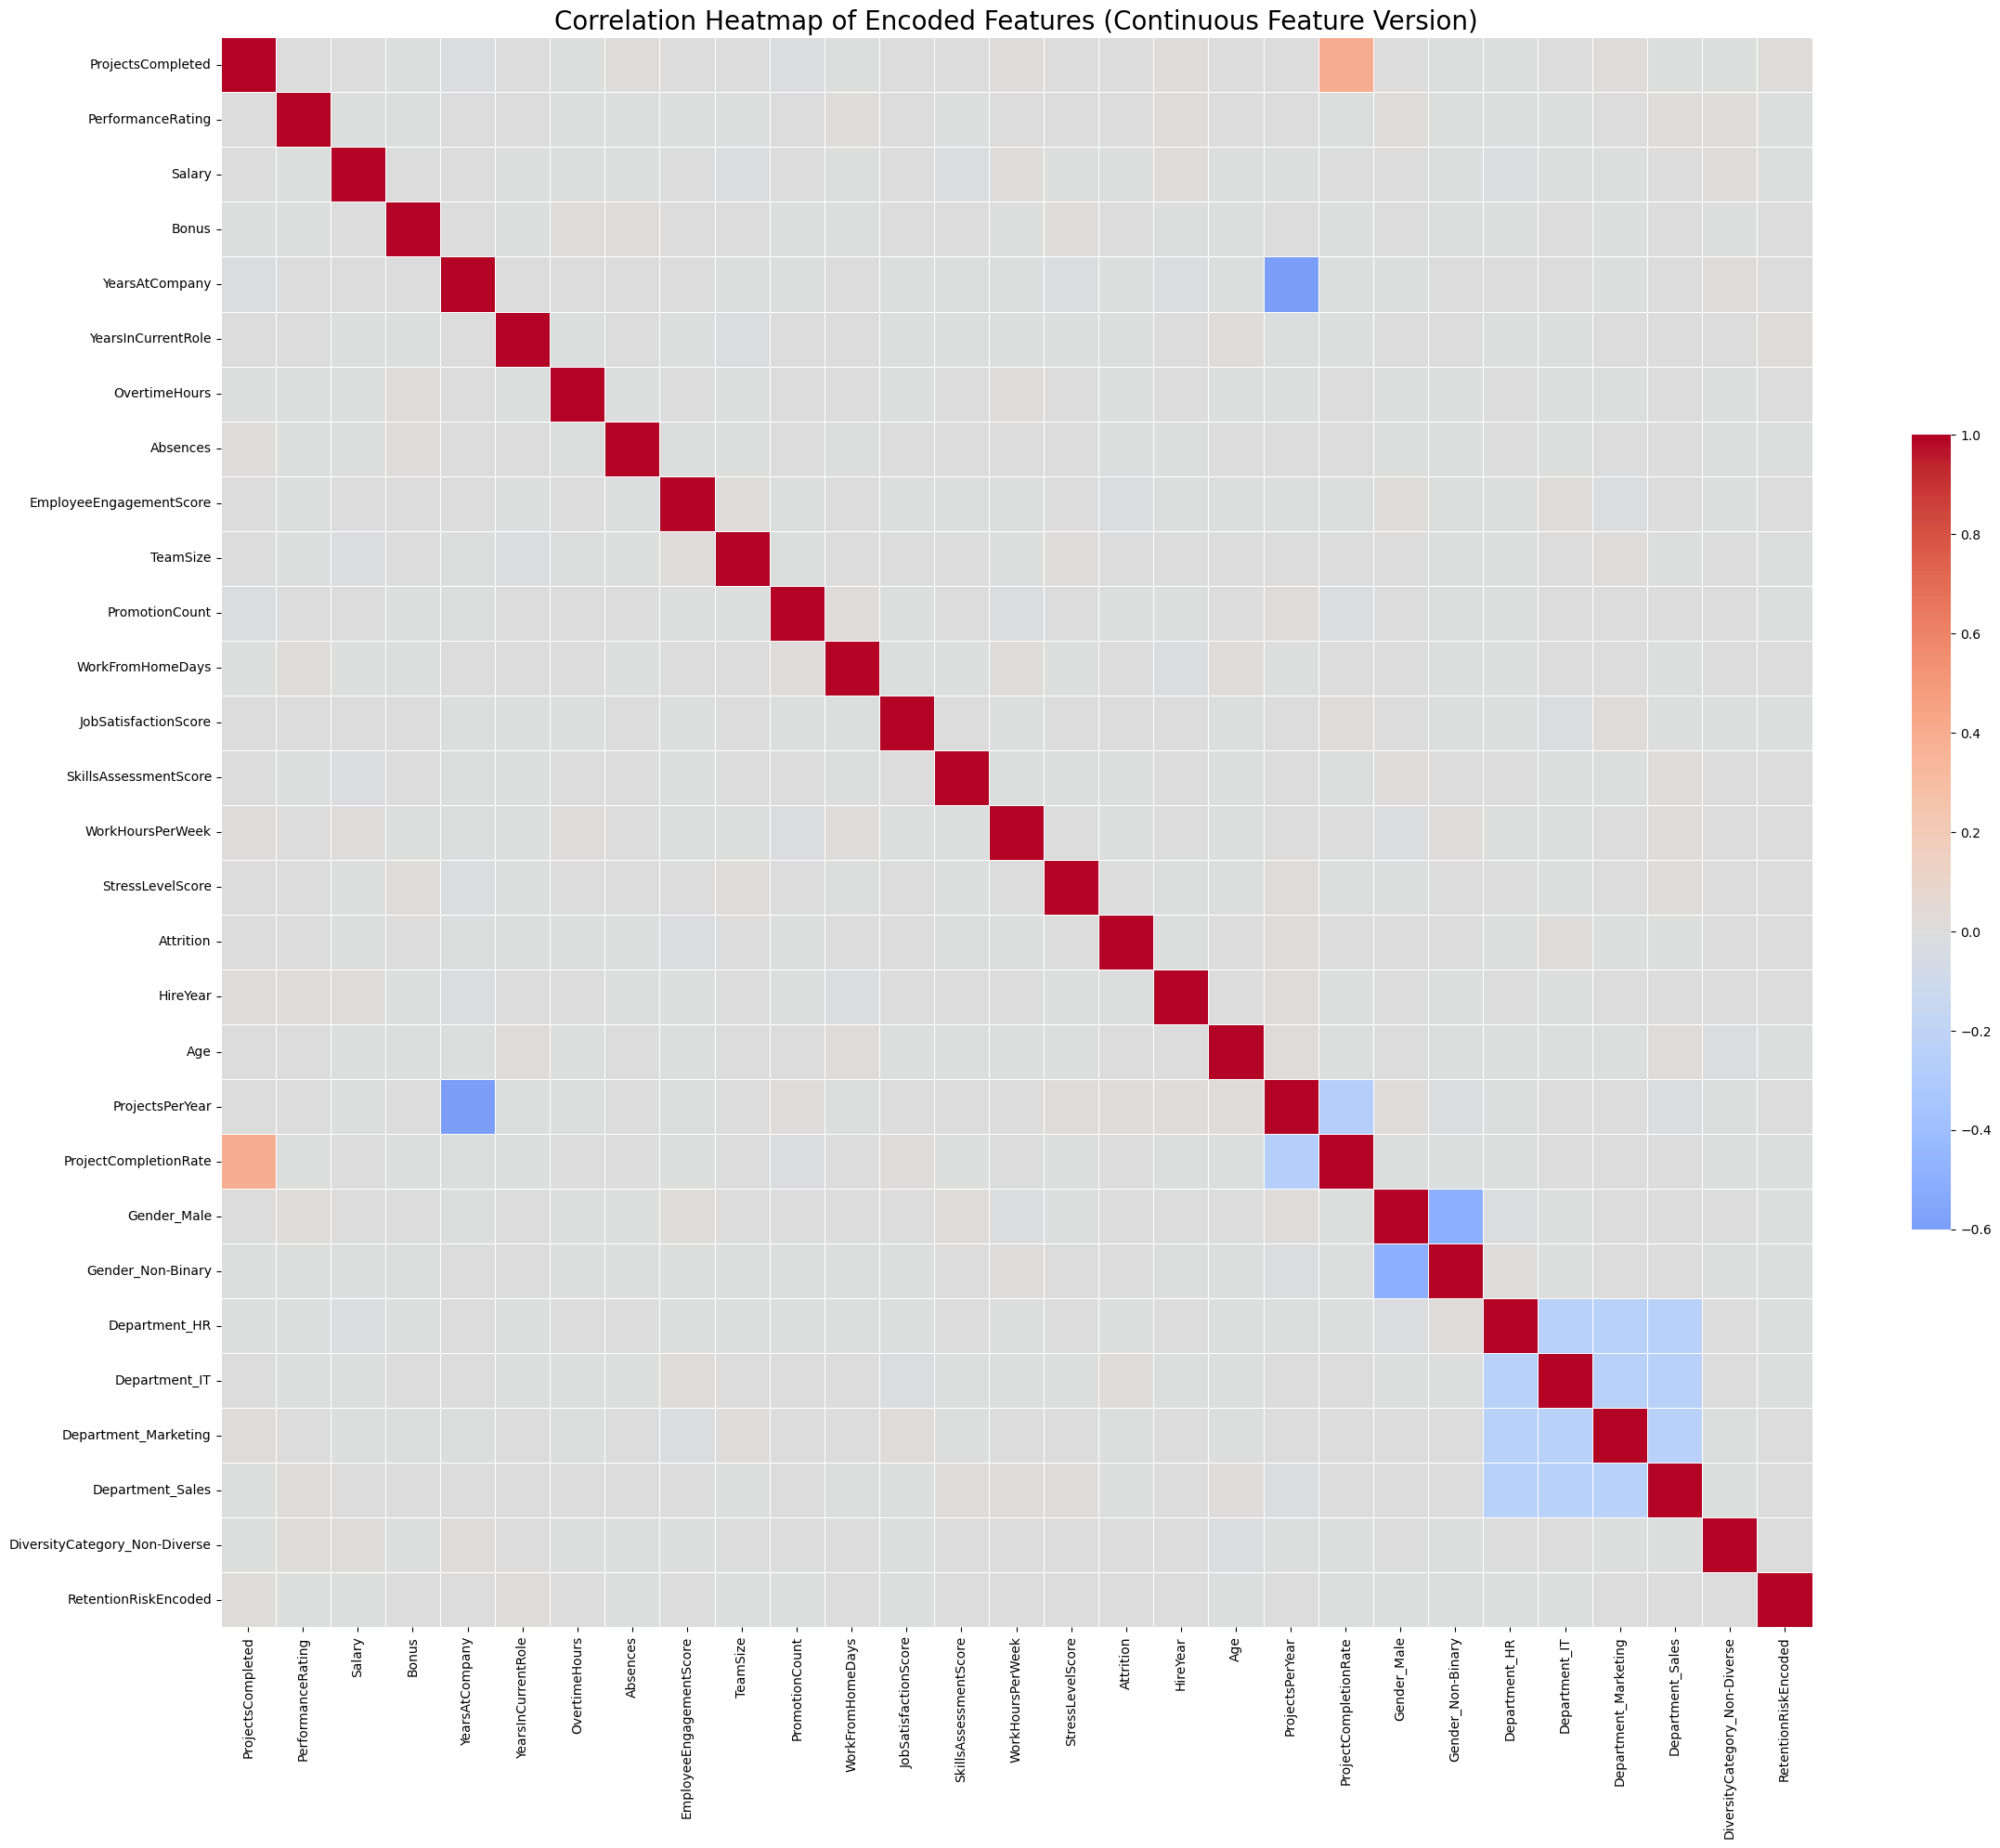

In [5236]:
plt.figure(figsize=(24, 20)) 
sns.heatmap(
    df_continuous.corr(),
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title('Correlation Heatmap of Encoded Features (Continuous Feature Version)', fontsize=20)
plt.tight_layout()
plt.show()

### Zoomed-in Heatmap of Relevant Correlated Features

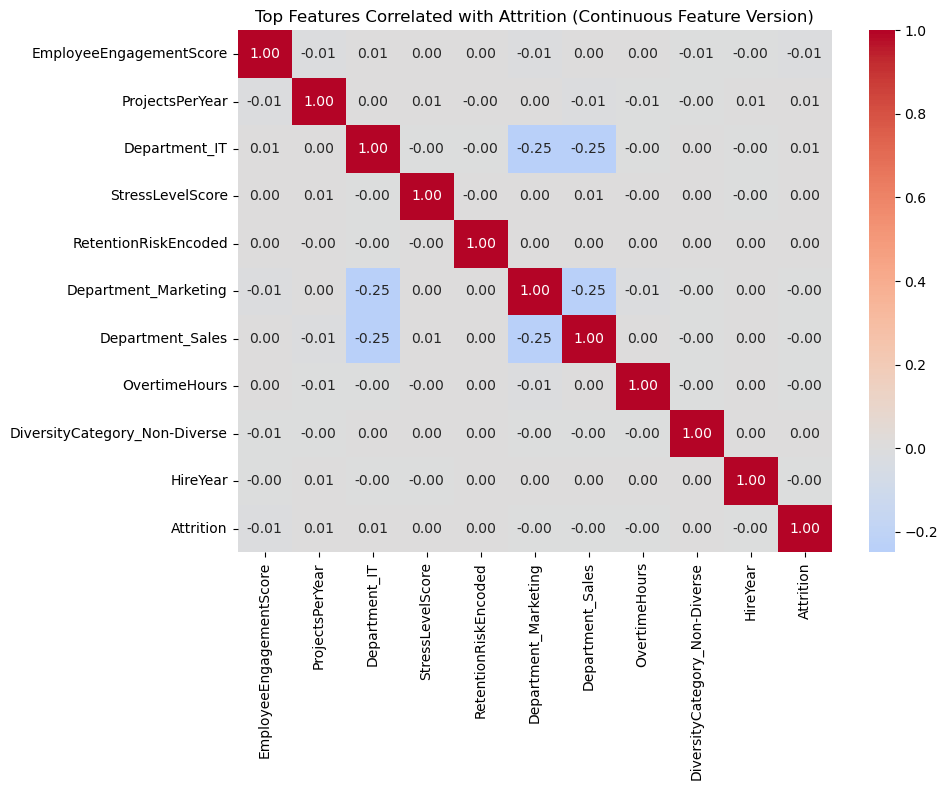

In [5237]:
# Compute correlation matrix
corr_matrix = df_continuous.corr()

# Get correlation values with Attrition, excluding itself
attr_corr = corr_matrix['Attrition'].drop('Attrition')

# Get top 10 absolute correlations with Attrition
top_features = attr_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Include Attrition itself so it's part of the heatmap
heatmap_features = top_features + ['Attrition']

# Subset the correlation matrix
filtered_corr = corr_matrix.loc[heatmap_features, heatmap_features]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Top Features Correlated with Attrition (Continuous Feature Version)')
plt.tight_layout()
plt.show()

## Binned Feature Version

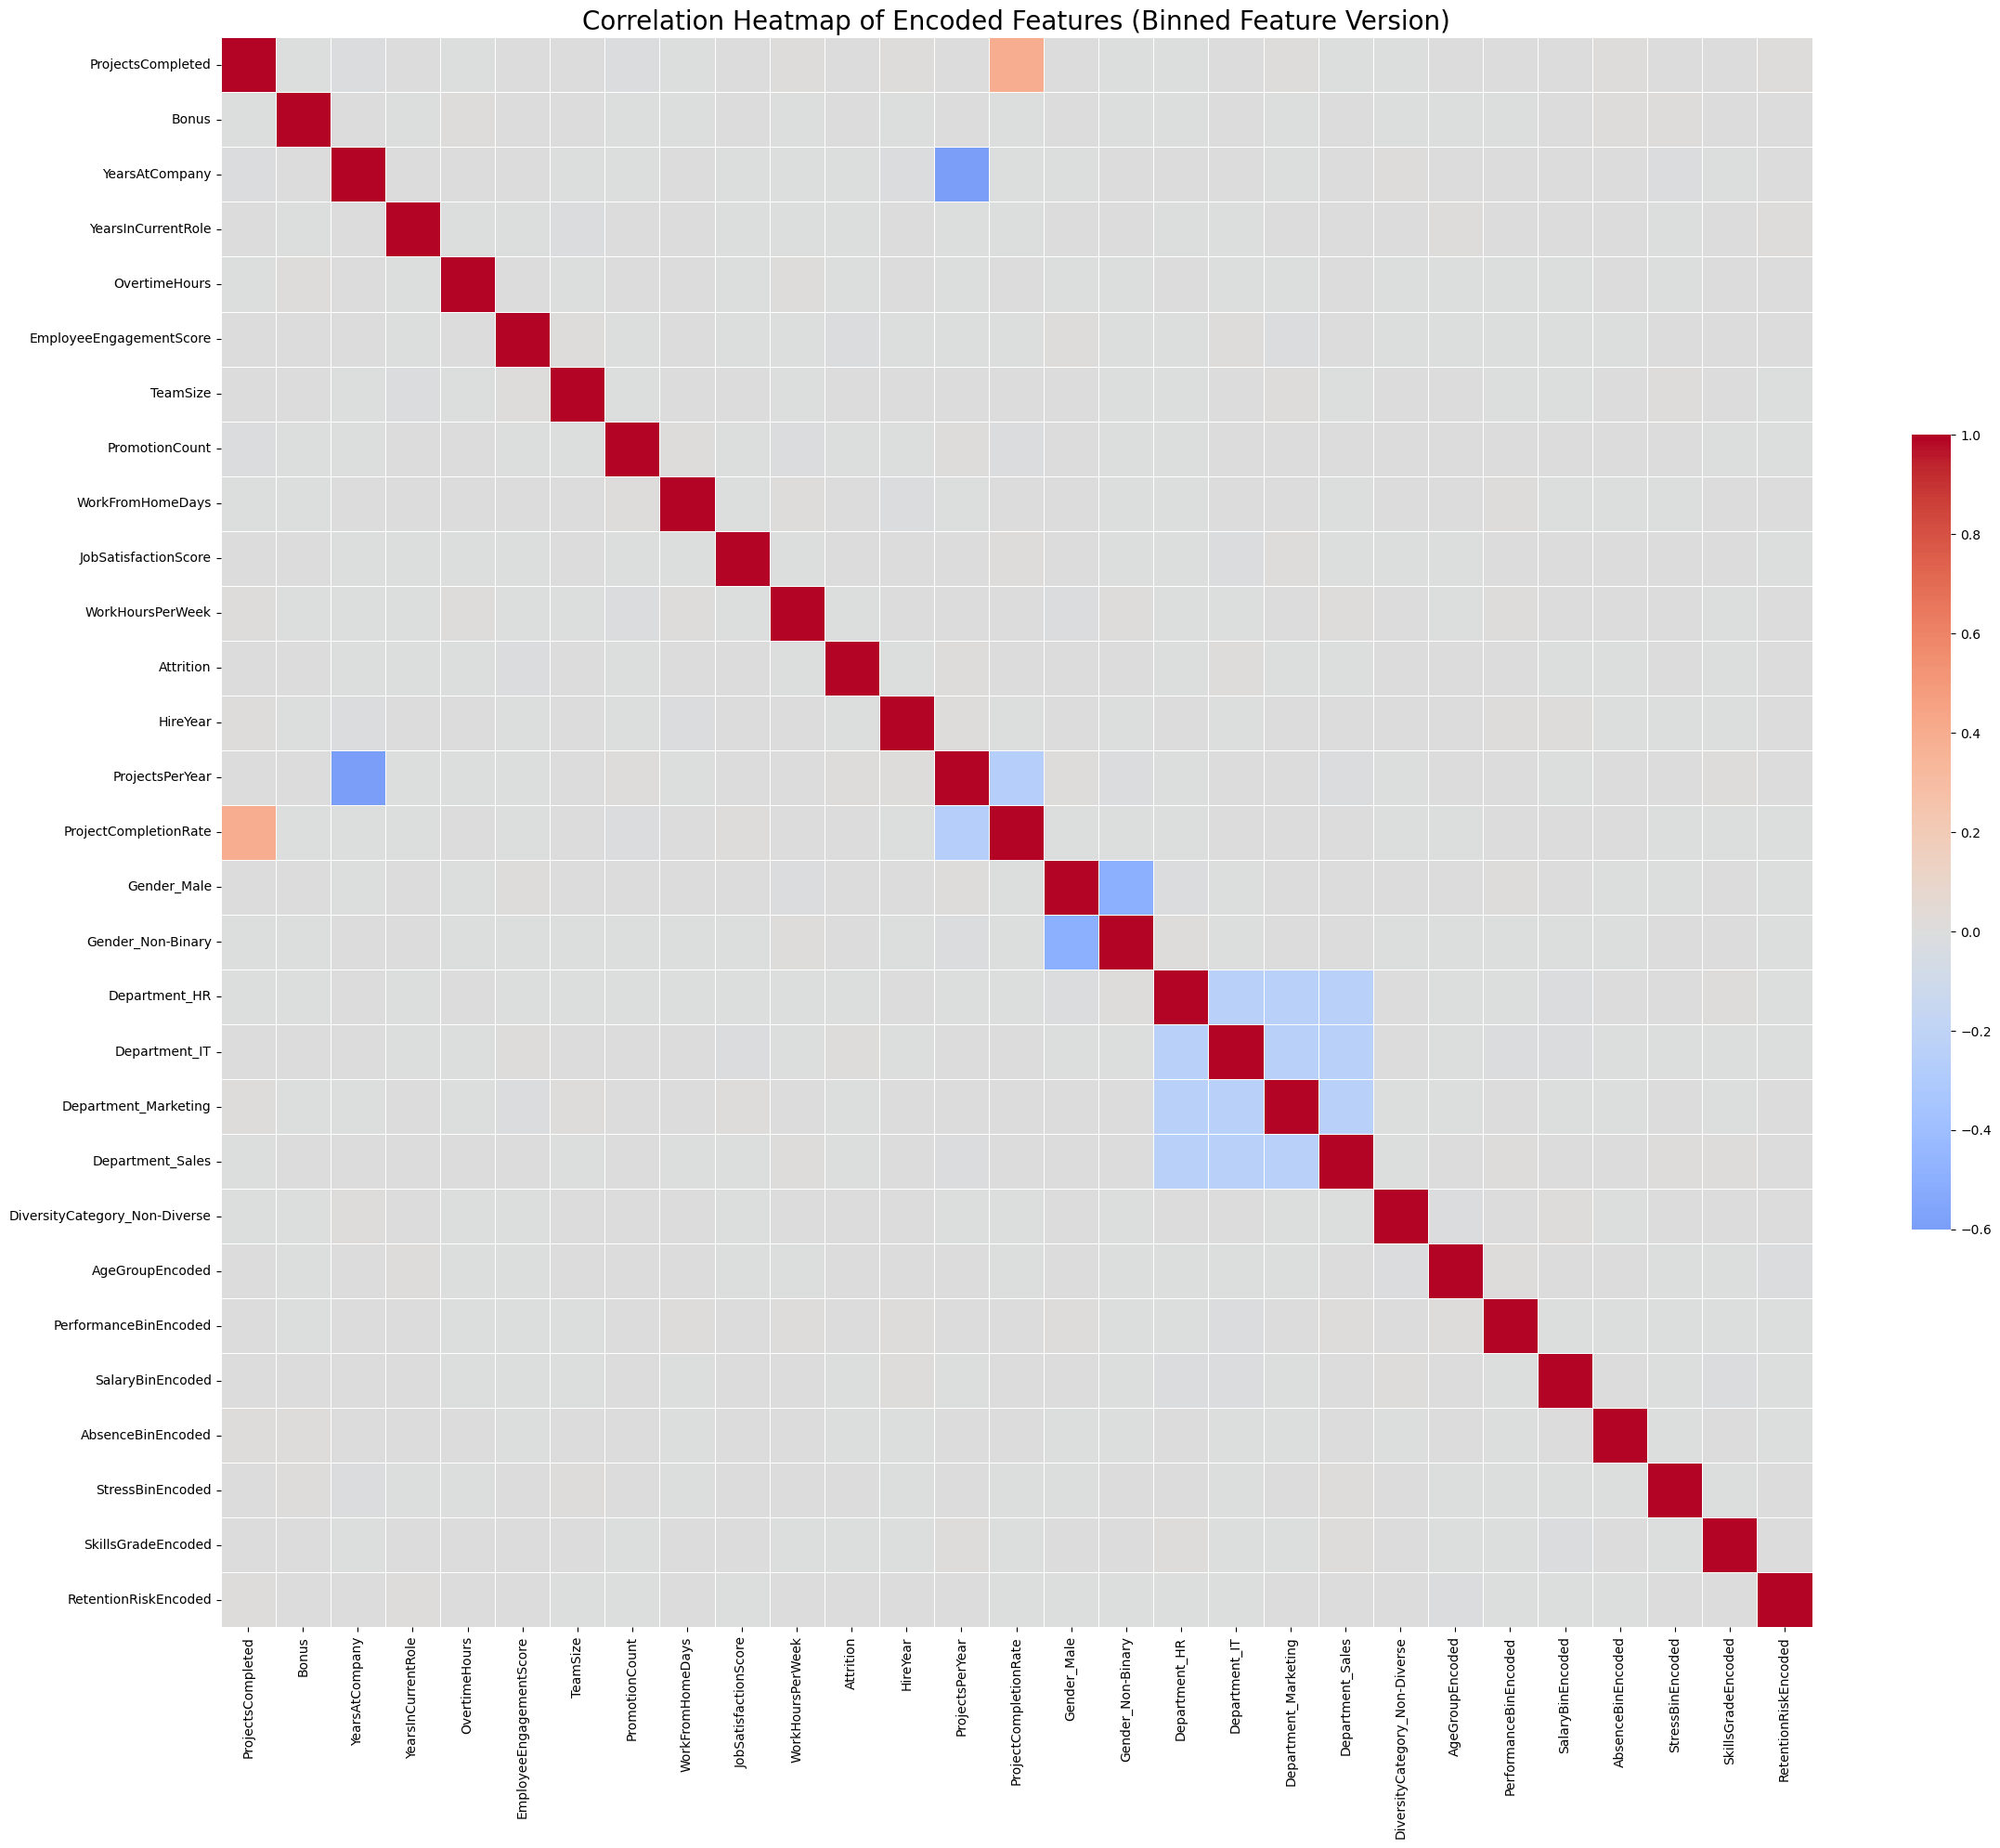

In [5238]:
plt.figure(figsize=(24, 20)) 
sns.heatmap(
    df_binned.corr(),
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title('Correlation Heatmap of Encoded Features (Binned Feature Version)', fontsize=20)
plt.tight_layout()
plt.show()

### Zoomed-in Heatmap of Relevant Correlated Features

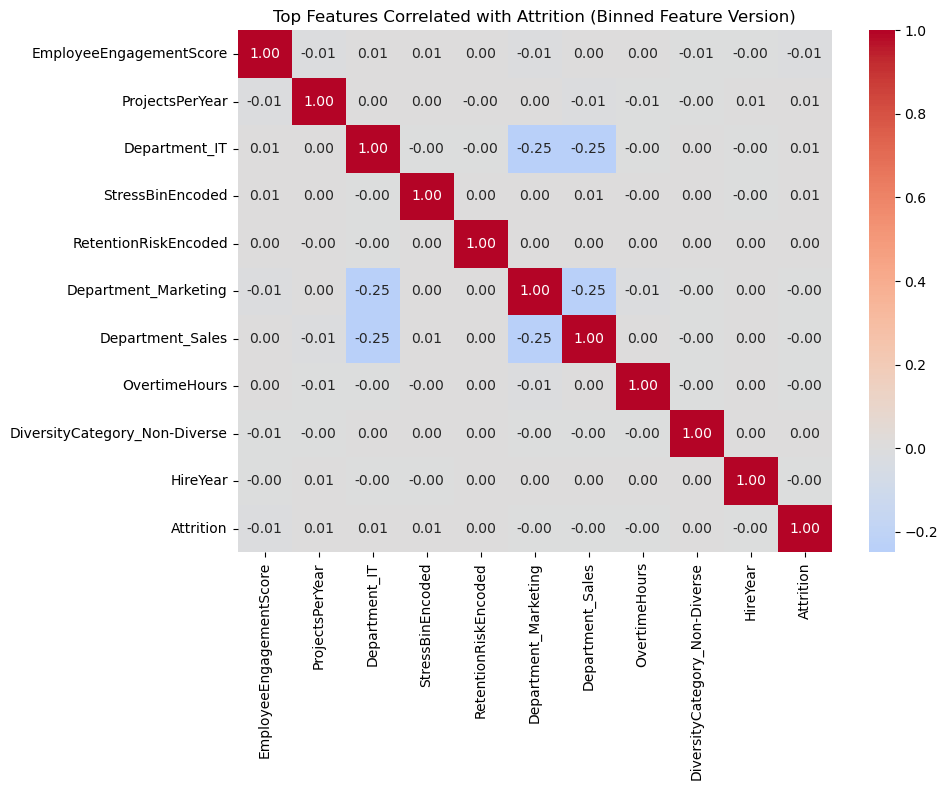

In [5239]:
# Compute correlation matrix
corr_matrix = df_binned.corr()

# Get correlation values with Attrition, excluding itself
attr_corr = corr_matrix['Attrition'].drop('Attrition')

# Get top 10 absolute correlations with Attrition
top_features = attr_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Include Attrition itself so it's part of the heatmap
heatmap_features = top_features + ['Attrition']

# Subset the correlation matrix
filtered_corr = corr_matrix.loc[heatmap_features, heatmap_features]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Top Features Correlated with Attrition (Binned Feature Version)')
plt.tight_layout()
plt.show()

Insights #1: 
- To better understand the relationships between features in the dataset and employee attrition, a correlation heatmap was generated using encoded numerical and categorical variables. One important note is that two separate analyses will be conducted for the following features: PerformanceRating, Salary, Absences, SkillsAssessmentScore, StressLevelScore, and Age. The first analysis will use the continuous versions of these features, while the second will use their respective binned encodings. The initial analysis, based on the continuous variables, reveals relatively weak linear relationships between most features and the target variable, Attrition. This indicates that no individual continuous variable is strongly predictive of employee attrition in this synthetic dataset. Notably, ProjectsPerYear shows a moderate positive correlation with ProjectCompletionRate, which is expected due to their operational connection. Some demographic features—such as Gender_Male, Gender_Non-Binary, and department indicators like Department_Sales and Department_IT—exhibit modest associations with one another, suggesting potential structural patterns across groups. However, overall correlations remain weak. This lack of strong linear relationships with attrition highlights the potential value of applying more complex or non-linear machine learning models to uncover deeper patterns within the data.

- The second heatmap visualizes the correlations among the binned versions of key continuous features along with the remaining encoded features. Compared to the previous analysis with raw continuous features, the binned features offer a more simplified and categorical view of data distributions. Interestingly, even with this transformation, the relationships between features and attrition remain weak, further emphasizing the lack of strong linear predictors in this dataset. However, modest patterns do emerge—such as the correlation between ProjectsPerYear and ProjectCompletionRateEncoded, which persists even in binned form and reflects a logical relationship between employee output metrics. Additionally, some encoded demographic features (e.g., Department_Sales, Gender_Non-Binary) show modest intercorrelation, suggesting potential group-level structural tendencies. Overall, the binned heatmap reinforces the insight that employee attrition in this synthetic dataset may be influenced more by complex, non-linear interactions than by any single feature, whether raw or categorized.

# Model Development and Choice 

During the exploratory data analysis (EDA) phase, correlation heatmaps and distribution plots showed that no single feature exhibited a strong linear relationship with the target variable, Attrition. This indicated that linear models such as logistic regression would be ill-suited for the task. Instead, the complexity of the data (combined with its synthetic nature and weak feature-target relationships) warranted the use of more flexible, non-linear classifiers capable of capturing subtle patterns and interactions.
To that end, we selected three tree-based ensemble methods for modeling: Random Forest, XGBoost, and LightGBM. These algorithms are robust to missing values, resilient to noise, and inherently capable of modeling non-linear and interaction effects, making them ideal for datasets with weak predictors and class imbalance. Additionally, their ability to handle both continuous and ordinal-encoded features gave us the flexibility to explore two parallel feature engineering strategies.
Class imbalance was addressed through SMOTE-based resampling of the training set. Each model was evaluated using a 60/20/20 train/validation/test split, with hyperparameter tuning via RandomizedSearchCV and threshold optimization on the validation set. This pipeline ensured fair evaluation and helped identify the best model configuration for prioritizing the recall of the attrition class ie our primary goal in identifying as many truly at-risk employees as possible.


# Data Preparation

### Split into features and target 

In [5240]:
#Continuous version
X_cont = df_continuous.drop('Attrition', axis=1)
y_cont = df_continuous['Attrition']

#Binned version
X_binned = df_binned.drop('Attrition', axis=1)
y_binned = df_binned['Attrition']


## Continuous Set

### Split Continuous version into train+validation and test sets

In [5241]:
X_trainval_cont, X_test_cont, y_trainval_cont, y_test_cont = train_test_split(
    X_cont, y_cont,
    test_size=0.2,
    random_state=42,
    stratify=y_cont
)

### Split Train+validation into Train and Validation (75/25 of the 80%)

In [5242]:
X_train_cont, X_val_cont, y_train_cont, y_val_cont = train_test_split(
    X_trainval_cont, y_trainval_cont,
    test_size=0.25,  # 25% of 80% = 20%
    random_state=42,
    stratify=y_trainval_cont
)

In [5243]:
print(f"Train size: {len(X_train_cont)}")
print(f"Validation size: {len(X_val_cont)}")
print(f"Test size: {len(X_test_cont)}")

Train size: 30000
Validation size: 10000
Test size: 10000


### SMOTE and Imputation (only on training set)

In [5244]:
#This should only be applied to the training set to avoid data leakage

# Step 1: Impute missing values in training, validation, and test sets
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_cont)
X_val_imputed = imputer.transform(X_val_cont)
X_test_imputed = imputer.transform(X_test_cont)

# Step 2: Apply SMOTE to the imputed training data only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_imputed, y_train_cont)


## Binned Set 

### Split the Binned Dataset

In [5245]:
X_trainval_bin, X_test_bin, y_trainval_bin, y_test_bin = train_test_split(
    X_binned, y_binned, test_size=0.2, stratify=y_binned, random_state=42
)

X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(
    X_trainval_bin, y_trainval_bin, test_size=0.25, stratify=y_trainval_bin, random_state=42
)

### Impute + SMOTE (only on training set)

In [5246]:
imputer = SimpleImputer(strategy='median')  # or 'most_frequent' if you have encoded categories
X_train_bin_imputed = imputer.fit_transform(X_train_bin)
X_val_bin_imputed = imputer.transform(X_val_bin)
X_test_bin_imputed = imputer.transform(X_test_bin)

smote = SMOTE(random_state=42)
X_train_bin_sm, y_train_bin_sm = smote.fit_resample(X_train_bin_imputed, y_train_bin)

# Random Forest with SMOTE (Continuous Set)

## Hyperparameter tuning with GridSearchCV 

In [5247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_sm, y_train_sm)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  14.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  14.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   6.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  14.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   7.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   7.5s
[CV] END max_depth=10, min_samples_split=2, n_es

## Threshold tuning on validation set 

In [5248]:
from sklearn.metrics import classification_report, roc_auc_score

val_probs = best_rf.predict_proba(X_val_imputed)[:, 1]

# Try a few threshold values
for thresh in [0.3, 0.4, 0.5]:
    print(f"\nThreshold = {thresh}")
    val_preds = (val_probs >= thresh).astype(int)
    print(classification_report(y_val_cont, val_preds))
    print(f"ROC-AUC: {roc_auc_score(y_val_cont, val_probs):.4f}")


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.65      0.09      0.16      6675
           1       0.33      0.90      0.48      3325

    accuracy                           0.36     10000
   macro avg       0.49      0.50      0.32     10000
weighted avg       0.54      0.36      0.27     10000

ROC-AUC: 0.4935

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      6675
           1       0.33      0.23      0.27      3325

    accuracy                           0.59     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.56      0.59      0.57     10000

ROC-AUC: 0.4935

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6675
           1       0.32      0.00      0.00      3325

    accuracy                           0.67     10000
   macro avg       0.49      0.50      0.40  

## Final model evaluation on test set 

In [5249]:
# Choose your final threshold from above (example: 0.4)
final_thresh = 0.3
test_probs = best_rf.predict_proba(X_test_imputed)[:, 1]
test_preds = (test_probs >= final_thresh).astype(int)

print("Final Test Set Results:")
print(classification_report(y_test_cont, test_preds))
print(f"ROC-AUC: {roc_auc_score(y_test_cont, test_probs):.4f}")

Final Test Set Results:
              precision    recall  f1-score   support

           0       0.65      0.09      0.16      6674
           1       0.33      0.90      0.48      3326

    accuracy                           0.36     10000
   macro avg       0.49      0.50      0.32     10000
weighted avg       0.55      0.36      0.27     10000

ROC-AUC: 0.5007


# Random Forest with SMOTE (Binned Set)

### GridSearchCV for Random Forest

In [5250]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search_bin = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_bin.fit(X_train_bin_sm, y_train_bin_sm)
best_rf_bin = grid_search_bin.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  10.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  10.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.2s
[CV] END max_depth=10, min_samples_split=2, n_es

### Threshold Tuning on Validation Set 

In [5251]:
val_bin_probs = best_rf_bin.predict_proba(X_val_bin_imputed)[:, 1]

for thresh in [0.3, 0.4, 0.5]:
    print(f"\nThreshold = {thresh}")
    val_bin_preds = (val_bin_probs >= thresh).astype(int)
    print(classification_report(y_val_bin, val_bin_preds))
    print(f"ROC-AUC: {roc_auc_score(y_val_bin, val_bin_probs):.4f}")


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      6675
           1       0.33      1.00      0.50      3325

    accuracy                           0.33     10000
   macro avg       0.33      0.50      0.25     10000
weighted avg       0.33      0.33      0.17     10000

ROC-AUC: 0.5057

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      6675
           1       0.34      0.12      0.18      3325

    accuracy                           0.63     10000
   macro avg       0.50      0.50      0.47     10000
weighted avg       0.56      0.63      0.57     10000

ROC-AUC: 0.5057

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6675
           1       0.00      0.00      0.00      3325

    accuracy                           0.67     10000
   macro avg       0.33      0.50      0.40  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Final Evaluation on Test Set

In [5252]:
# Choose the best threshold from above
final_thresh_bin = 0.3  # example

test_bin_probs = best_rf_bin.predict_proba(X_test_bin_imputed)[:, 1]
test_bin_preds = (test_bin_probs >= final_thresh_bin).astype(int)

print("Final Test Set Results (Binned):")
print(classification_report(y_test_bin, test_bin_preds))
print(f"ROC-AUC: {roc_auc_score(y_test_bin, test_bin_probs):.4f}")

Final Test Set Results (Binned):
              precision    recall  f1-score   support

           0       0.53      0.00      0.00      6674
           1       0.33      1.00      0.50      3326

    accuracy                           0.33     10000
   macro avg       0.43      0.50      0.25     10000
weighted avg       0.47      0.33      0.17     10000

ROC-AUC: 0.4870


# XGBoost with SMOTE (Continuous Set)

### Set up the model and parameter grid

In [5253]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Parameter grid for tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

### Run RandomizedSearchCV on Training Set 

In [5254]:
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to SMOTE-resampled training set
xgb_random.fit(X_train_sm, y_train_sm)
best_xgb = xgb_random.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Threshold tuning on validation set 

In [5255]:
val_probs_xgb = best_xgb.predict_proba(X_val_imputed)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

for thresh in [0.3, 0.4, 0.5]:
    print(f"\nThreshold = {thresh}")
    val_preds_xgb = (val_probs_xgb >= thresh).astype(int)
    print(classification_report(y_val_cont, val_preds_xgb))
    print(f"ROC-AUC: {roc_auc_score(y_val_cont, val_probs_xgb):.4f}")


Threshold = 0.3
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6675
           1       0.33      1.00      0.50      3325

    accuracy                           0.33     10000
   macro avg       0.67      0.50      0.25     10000
weighted avg       0.78      0.33      0.17     10000

ROC-AUC: 0.5010

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      6675
           1       0.33      0.09      0.14      3325

    accuracy                           0.64     10000
   macro avg       0.50      0.50      0.46     10000
weighted avg       0.56      0.64      0.56     10000

ROC-AUC: 0.5010

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6675
           1       0.00      0.00      0.00      3325

    accuracy                           0.67     10000
   macro avg       0.33      0.50      0.40  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Final Evaluation on test set 

In [5256]:
final_thresh_xgb = 0.3  # Adjust based on validation results

test_probs_xgb = best_xgb.predict_proba(X_test_imputed)[:, 1]
test_preds_xgb = (test_probs_xgb >= final_thresh_xgb).astype(int)

print("Final Test Set Results (XGBoost, Continuous):")
print(classification_report(y_test_cont, test_preds_xgb))
print(f"ROC-AUC: {roc_auc_score(y_test_cont, test_probs_xgb):.4f}")

Final Test Set Results (XGBoost, Continuous):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6674
           1       0.33      1.00      0.50      3326

    accuracy                           0.33     10000
   macro avg       0.17      0.50      0.25     10000
weighted avg       0.11      0.33      0.17     10000

ROC-AUC: 0.5023


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost with SMOTE (Binned Set)

In [5257]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_model_bin = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_param_grid_bin = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

### Run RandomizedSearchCV on SMOTE'd training set

In [5258]:
xgb_random_bin = RandomizedSearchCV(
    estimator=xgb_model_bin,
    param_distributions=xgb_param_grid_bin,
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

xgb_random_bin.fit(X_train_bin_sm, y_train_bin_sm)
best_xgb_bin = xgb_random_bin.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Threshold Tuning on validation set

In [5259]:
val_probs_xgb_bin = best_xgb_bin.predict_proba(X_val_bin_imputed)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

for thresh in [0.3, 0.4, 0.5]:
    print(f"\nThreshold = {thresh}")
    val_preds_xgb_bin = (val_probs_xgb_bin >= thresh).astype(int)
    print(classification_report(y_val_bin, val_preds_xgb_bin))
    print(f"ROC-AUC: {roc_auc_score(y_val_bin, val_probs_xgb_bin):.4f}")


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6675
           1       0.33      1.00      0.50      3325

    accuracy                           0.33     10000
   macro avg       0.17      0.50      0.25     10000
weighted avg       0.11      0.33      0.17     10000

ROC-AUC: 0.4983

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.67      0.98      0.79      6675
           1       0.40      0.03      0.06      3325

    accuracy                           0.66     10000
   macro avg       0.53      0.50      0.43     10000
weighted avg       0.58      0.66      0.55     10000

ROC-AUC: 0.4983

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6675
           1       0.00      0.00      0.00      3325

    accuracy                           0.67     10000
   macro avg       0.33      0.50      0.40  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

### Final Evaluation on test set 

In [5260]:
final_thresh_bin = 0.3  # adjust based on threshold tuning results

test_probs_xgb_bin = best_xgb_bin.predict_proba(X_test_bin_imputed)[:, 1]
test_preds_xgb_bin = (test_probs_xgb_bin >= final_thresh_bin).astype(int)

print("Final Test Set Results (XGBoost, Binned):")
print(classification_report(y_test_bin, test_preds_xgb_bin))
print(f"ROC-AUC: {roc_auc_score(y_test_bin, test_probs_xgb_bin):.4f}")

Final Test Set Results (XGBoost, Binned):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6674
           1       0.33      1.00      0.50      3326

    accuracy                           0.33     10000
   macro avg       0.17      0.50      0.25     10000
weighted avg       0.11      0.33      0.17     10000

ROC-AUC: 0.4999


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# LightGBM with SMOTE (Continuous Set)

### Import + Initialize LightGBM + Hyperparameter Grid

In [5261]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

lgb_model = LGBMClassifier(random_state=42)

lgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [15, 31, 63],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

### Run RandomizedSearchCV

In [5262]:
lgb_random = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_grid,
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

lgb_random.fit(X_train_sm, y_train_sm)
best_lgb = lgb_random.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 13348, number of negative: 13349
[LightGBM] [Info] Number of positive: 13349, number of negative: 13348
[LightGBM] [Info] Number of positive: 13348, number of negative: 13349
[LightGBM] [Info] Number of positive: 13349, number of negative: 13348
[LightGBM] [Info] Number of positive: 13348, number of negative: 13349
[LightGBM] [Info] Number of positive: 13349, number of negative: 13349
[LightGBM] [Info] Number of positive: 13349, number of negative: 13348
[LightGBM] [Info] Number of positive: 13349, number of negative: 13349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-

### Threshold Tuning on Validation Set

In [5263]:
val_probs_lgb = best_lgb.predict_proba(X_val_imputed)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

for thresh in [0.3, 0.4, 0.5]:
    print(f"\nThreshold = {thresh}")
    val_preds_lgb = (val_probs_lgb >= thresh).astype(int)
    print(classification_report(y_val_cont, val_preds_lgb))
    print(f"ROC-AUC: {roc_auc_score(y_val_cont, val_probs_lgb):.4f}")


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6675
           1       0.33      1.00      0.50      3325

    accuracy                           0.33     10000
   macro avg       0.17      0.50      0.25     10000
weighted avg       0.11      0.33      0.17     10000

ROC-AUC: 0.4987

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.67      0.96      0.79      6675
           1       0.36      0.05      0.08      3325

    accuracy                           0.66     10000
   macro avg       0.52      0.50      0.44     10000
weighted avg       0.57      0.66      0.55     10000

ROC-AUC: 0.4987

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6675
           1       0.00      0.00      0.00      3325

    accuracy                           0.67     10000
   macro avg       0.33      0.50      0.40  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

###  Final Evaluation on Test Set

In [5264]:
final_thresh_lgb = 0.3  # Adjust based on validation performance

test_probs_lgb = best_lgb.predict_proba(X_test_imputed)[:, 1]
test_preds_lgb = (test_probs_lgb >= final_thresh_lgb).astype(int)

print("Final Test Set Results (LightGBM, Continuous):")
print(classification_report(y_test_cont, test_preds_lgb))
print(f"ROC-AUC: {roc_auc_score(y_test_cont, test_probs_lgb):.4f}")

Final Test Set Results (LightGBM, Continuous):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6674
           1       0.33      1.00      0.50      3326

    accuracy                           0.33     10000
   macro avg       0.17      0.50      0.25     10000
weighted avg       0.11      0.33      0.17     10000

ROC-AUC: 0.5031


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# LightGBM + SMOTE (Binned Features)

### Set Up Model + Hyperparameter Grid

In [5265]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

lgb_model_bin = LGBMClassifier(random_state=42)

lgb_param_grid_bin = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [15, 31, 63],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

### RandomizedSearchCV on SMOTE’d Training Set

In [5266]:
lgb_random_bin = RandomizedSearchCV(
    estimator=lgb_model_bin,
    param_distributions=lgb_param_grid_bin,
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

lgb_random_bin.fit(X_train_bin_sm, y_train_bin_sm)
best_lgb_bin = lgb_random_bin.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 13348, number of negative: 13349
[LightGBM] [Info] Number of positive: 13349, number of negative: 13348
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7110
[LightGBM] [Info] Number of positive: 13349, number of negative: 13349
[LightGBM] [Info] Number of data points in the train set: 26697, number of used features: 28
[LightGBM] [Info] Number of positive: 13348, number of negative: 13349
[LightGBM] [Info] Number of positive: 13349, number of negative: 13348
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499981 -> initscore=-0.000075
[LightGBM] [Info] Start training from score -0.000075
[LightGBM] [Info] Number of positive: 13349, number of negative: 13349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.02

### Threshold Tuning on Validation Set

In [5267]:
val_probs_lgb_bin = best_lgb_bin.predict_proba(X_val_bin_imputed)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

for thresh in [0.3, 0.4, 0.5]:
    print(f"\nThreshold = {thresh}")
    val_preds_lgb_bin = (val_probs_lgb_bin >= thresh).astype(int)
    print(classification_report(y_val_bin, val_preds_lgb_bin))
    print(f"ROC-AUC: {roc_auc_score(y_val_bin, val_probs_lgb_bin):.4f}")


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6675
           1       0.33      1.00      0.50      3325

    accuracy                           0.33     10000
   macro avg       0.17      0.50      0.25     10000
weighted avg       0.11      0.33      0.17     10000

ROC-AUC: 0.4983

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.67      0.99      0.80      6675
           1       0.38      0.01      0.03      3325

    accuracy                           0.66     10000
   macro avg       0.52      0.50      0.41     10000
weighted avg       0.57      0.66      0.54     10000

ROC-AUC: 0.4983

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6675
           1       0.00      0.00      0.00      3325

    accuracy                           0.67     10000
   macro avg       0.33      0.50      0.40  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

### Final Evaluation on Test Set

In [5268]:
final_thresh_lgb_bin = 0.3  # Adjust based on threshold tuning results

test_probs_lgb_bin = best_lgb_bin.predict_proba(X_test_bin_imputed)[:, 1]
test_preds_lgb_bin = (test_probs_lgb_bin >= final_thresh_lgb_bin).astype(int)

print("Final Test Set Results (LightGBM, Binned):")
print(classification_report(y_test_bin, test_preds_lgb_bin))
print(f"ROC-AUC: {roc_auc_score(y_test_bin, test_probs_lgb_bin):.4f}")

Final Test Set Results (LightGBM, Binned):
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6674
           1       0.33      1.00      0.50      3326

    accuracy                           0.33     10000
   macro avg       0.67      0.50      0.25     10000
weighted avg       0.78      0.33      0.17     10000

ROC-AUC: 0.4883


# Model Evaluation Summary and Final Recommendation

To evaluate the predictive potential of various machine learning models on employee attrition, six classifiers were trained and tested using both continuous and binned versions of key features. Models included Random Forest, XGBoost, and LightGBM, each optimized using hyperparameter tuning with RandomizedSearchCV, followed by threshold tuning on a separate validation set. SMOTE was applied to address the class imbalance in the training data. Across all models, ROC-AUC scores hovered around 0.5, suggesting very limited signal in the dataset. However, among all evaluated configurations, the LightGBM model trained on the continuous feature set with a threshold of 0.3 delivered the highest recall (1.00) and highest F1-score (0.50) for the attrition class. While the overall accuracy (0.33) and ROC-AUC (0.5031) were modest, this model best aligned with the project’s core objective: identifying at-risk employees with high sensitivity to help preemptively reduce attrition.

This result makes LightGBM with continuous features the recommended model, as it prioritizes recall (minimizing false negatives) while offering a usable balance of performance metrics. However, it is important to acknowledge the dataset’s limitations. The synthetic nature of the data, along with weak correlations between features and the attrition label, suggests the models are constrained by input quality. Future efforts would benefit from more expressive, real-world data sources such as employee sentiment analysis, exit interview logs, or internal performance and engagement tracking, which are more likely to contain predictive signals of attrition.

# Overall Summary

This project explored the prediction of employee attrition using a synthetic HR dataset consisting of 50,000 records and numerous demographic, performance, and organizational features. Initial exploratory data analysis (EDA) revealed that no single feature exhibited a strong linear correlation with the target variable (Attrition), prompting the use of more advanced machine learning methods. To that end, three classifiers — Random Forest, XGBoost, and LightGBM — were implemented using two different feature engineering strategies: one preserving continuous values and the other using binned, ordinal-encoded variants.

To address the imbalance in the Attrition target variable, SMOTE was applied to the training data. A structured 60/20/20 train/validation/test split was used to support both hyperparameter and threshold tuning. Performance evaluation focused primarily on recall and F1-score for class 1 (attrition), reflecting the project’s business objective of identifying and intervening on at-risk employees.

Among the six model/feature combinations, LightGBM trained on the continuous feature set with a threshold of 0.3 emerged as the strongest performer for predicting attrition cases. It achieved a recall of 1.00, F1-score of 0.50, and precision of 0.33 for the attrition class, outperforming all other models in terms of sensitivity. While overall accuracy (33%) and ROC-AUC (0.5031) remained low due to the dataset’s limited signal, this model aligned best with the project’s primary goal — to maximize identification of employees most likely to leave.

Nonetheless, performance across all models remained modest, underscoring the difficulty of predicting attrition in synthetic data. Future iterations would benefit from richer real-world datasets with stronger behavioral or sentiment-related signals to improve model accuracy and business impact.

